In [1]:
# Purpose: Create regression maps for ENSO and SAM climate modes and save them 
#          as a .nc file
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ #                         
#     Maurice F. Huguenin, m.huguenin-virchaux@unsw.edu.au, 28. 09. 2021      #                                                
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ #
# % preamble ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ #                         
base = '/g/data/e14/mv7494/access-om2/archive/025deg_jra55_iaf/'
save = '/home/561/mv7494/IPOAnt_figures/'

import xarray as xr # for working with labelled multi-dimensional arrays                                                                
import numpy as np # for numerical operations                                                           
import string # for subplot annotation                                                                  
import matplotlib.pyplot as plt # for matlab-like plotting                                              
from matplotlib.patches import Rectangle # for shaded rectangle
import pandas as pd
import cartopy.crs as ccrs # for maps     
from matplotlib import gridspec
from cdo import *
cdo = Cdo()
import cosima_cookbook as cc
import os
import sys
import scipy
import warnings
import cmocean as cm
from matplotlib.ticker import FormatStrFormatter # to format y axis labels
from wrf import to_np # conversion to arrays required for arrows on maps    
import matplotlib.path as mpath 
import cartopy.feature as cfeature
import matplotlib.patheffects as PathEffects
warnings.filterwarnings('ignore') # suppress warnings
from matplotlib import ticker
import nc_time_axis
import time
import cftime
import cartopy.mpl.ticker as cticker
import string # for subplot annotation
import cartopy.feature as cfeature 

#from dask.distributed import Client
#client = Client(n_workers=16)         
#client
rotblau = [[0.4 , 0.  , 0.12], [0.47, 0.02, 0.13], [0.62, 0.07, 0.16], [0.66, 0.16,  0.2],
           [0.8 , 0.3 , 0.27], [0.87, 0.44, 0.35], [0.93, 0.58, 0.45], [0.96, 0.7 , 0.58], 
           [0.98, 0.8 , 0.71], [0.98, 0.94, 0.92], [0.93, 0.95, 0.96], [0.85, 0.91, 0.95],
           [0.76, 0.87, 0.93], [0.64, 0.8 , 0.89], [0.49, 0.72, 0.84], [0.34, 0.62, 0.79], 
           [0.23, 0.53, 0.74], [0.16, 0.44, 0.7] , [0.1 ,0.35, 0.6], [0.05, 0.24, 0.45], [0.02, 0.19, 0.38]]

### 1000 m isobath shelf mask

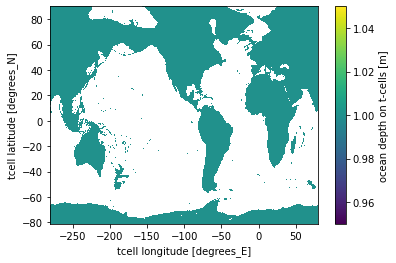

In [2]:
base_spin = '/g/data/e14/mv7494/access-om2/archive/01deg_jra55_ryf_IPOCtrl/output976/'
vars = ['ht', 'hu']
for f in range(2): # loop through the t- and u-grid
    field = xr.open_mfdataset(base_spin + '/ocean/ocean_grid.nc')[vars[f]]
    above1000 = field.where(field >= 1000,1) # set all values smaller than 1000 to 1
    above1000 = above1000.where(above1000 < 1000, drop=False) # remove all values bigger than 1000
    if f == 0: above1000_tcells = above1000
    if f == 1: above1000_ucells = above1000
above1000_tcells.plot()
b = field.fillna(0)

### Checking various anomalies

### Plotting SWMT for Weddell and Ross Sea in both IPO positive and negative simulations

In [3]:
%%time
exp    = ['IPOCtrl', 'IPOPos', 'IPONeg', 'IPOInt', 'IPO2sNeg', 
          'easterlies_up10', 'easterlies_down10', 'easterlies_control', 
          '01deg_jra55v140_iaf_cycle3', 'AKM_IPOCtrl', 'AKM_IPO2sNeg']
legend_label    = ['Control run', 'IPO$^{+}$', 'IPO$^{-}$', 'IPO$^{2014-2023}$', 'IPO$^{-2\sigma}$', 
                   'Winds$^{+10\%}$', 'Winds$^{-10\%}$', 'Winds CTRL',
                  '1958-2018 mean', 'new .exe IPOCtrl', 'new .exe IPO2sNeg']
region = ['Wedell Sea', 'Prydz Bay', 'Adélie Land', 'Ross Sea']

for e in range(11): # loop through the four different experiments (Ctrl, Pos, Neg, 2sNeg)
    base_SWMT = '/g/data/e14/mv7494/IPOAnt_analysis/data_'+exp[e]+'_AABW_final/'
    print('data_'+exp[e]+'_AABW_final/'); print('------------------------')
    # only select the last two years for each simulation
    SWMT = xr.open_mfdataset(base_SWMT + 'SWMT_in_AABW_formation_region_for_sig0_27-2_28-1_01deg_jra55*.nc')

    SWMT ['isopycnal_bins'] = SWMT.isopycnal_bins - .5*(
        SWMT.isopycnal_bins[1]-SWMT.isopycnal_bins[0])

    # upper boundary of sig0 bin
    SWMT = (SWMT.binned_heat_transformation_in_AABW_region + SWMT.binned_salt_transformation_in_AABW_region)
    
    if e == 0: SWMT_IPOCtrl             = SWMT[-24:,:,:].mean('time')
    if e == 1: SWMT_IPOPos              = SWMT[-24:,:,:].mean('time')
    if e == 2: SWMT_IPONeg              = SWMT[-24:,:,:].mean('time')
    if e == 3: SWMT_IPOInt              = SWMT.groupby('time.year').mean('time') # for the interannual data, take the annual mean
    if e == 4: SWMT_IPO2sNeg            = SWMT[-24:,:,:].mean('time')
    if e == 5: SWMT_easterlies_up10     = SWMT.mean('time')    
    if e == 6: SWMT_easterlies_down10   = SWMT.mean('time')
    if e == 7: SWMT_easterlies_control  = SWMT.mean('time')
    if e == 8: SWMT_interannual_control = SWMT.mean('time') # take time mean over all the JRA55-do-1-4 IAF run from 1958-2019
    if e == 9: SWMT_AKM_IPOCtrl         = SWMT.mean('time')
    if e == 10: SWMT_AKM_IPO2sNeg       = SWMT[-24:,:,:].mean('time')

data_IPOCtrl_AABW_final/
------------------------
data_IPOPos_AABW_final/
------------------------
data_IPONeg_AABW_final/
------------------------
data_IPOInt_AABW_final/
------------------------
data_IPO2sNeg_AABW_final/
------------------------
data_easterlies_up10_AABW_final/
------------------------
data_easterlies_down10_AABW_final/
------------------------
data_easterlies_control_AABW_final/
------------------------
data_01deg_jra55v140_iaf_cycle3_AABW_final/
------------------------
data_AKM_IPOCtrl_AABW_final/
------------------------
data_AKM_IPO2sNeg_AABW_final/
------------------------
CPU times: user 937 ms, sys: 81.6 ms, total: 1.02 s
Wall time: 1.15 s


### Figure with interannual variability even in the time-constant atmospheric forcing sensitivity experiments

In [4]:
#plt.figure(figsize=(16,10))
#plt.plot(SWMT_AKM_IPOCtrl[:,0], SWMT.isopycnal_bins, color='grey', linewidth=5,label='Ctrl')
#for f in range(int(len(SWMT_AKM_IPO2sNeg.time)/12)):
#    plt.plot(SWMT_AKM_IPO2sNeg.groupby('time.year').mean('time')[f,:,0], SWMT.isopycnal_bins, c=rotblau[(f+3)], label='Year '+str(f+1))
#plt.title('Weddell Sea SWMT (Sv) in the IPO$^{-2\sigma}$ simulation', fontsize=16); plt.legend(ncol=2, fontsize=16)
#plt.xlim([-.01, 1.75]); plt.ylim([27.75, 28.05]); plt.gca().invert_yaxis()
#plt.xticks(fontsize=16); plt.yticks(fontsize=16); plt.axvline(0, lw=.5, c='grey')

### Plotting routine for SWMT with bars

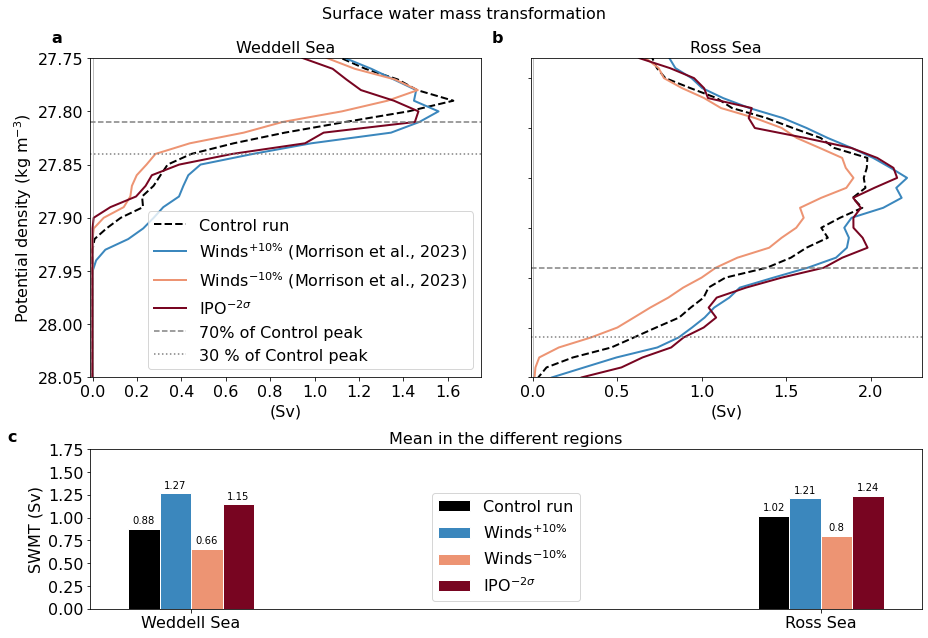

In [5]:
fig = plt.figure(figsize=(13,9),tight_layout=True,facecolor='w',edgecolor='k'); gs = gridspec.GridSpec(2,2, width_ratios = [1,1], height_ratios = [1,.5]) 
# --------------------------------------------------------------------------------------------------------------------------------------------------- #
ax1 = plt.subplot(gs[0,0]); plt.title('Weddell Sea', fontsize=16)#\n surface water mass transformation', fontsize=16)  
#plt.plot(SWMT_IPOCtrl[:,0], SWMT.isopycnal_bins, label='old .exe IPOCtrl', c='g', linewidth=2)
#plt.plot(SWMT_IPOPos[:,0], SWMT.isopycnal_bins, label=legend_label[1], color=rotblau[16]); # plt.fill_between(SWMT_IPOPos[:,0], SWMT.isopycnal_bins, alpha=.2) # for El Niño
#plt.plot(SWMT_IPONeg[:,0], SWMT.isopycnal_bins, label=legend_label[2], color=rotblau[6]); 
#plt.plot(SWMT_IPO2sNeg[:,0], SWMT.isopycnal_bins, label='old .exe IPO2sNeg',  c='r', linewidth=2)

# adding Adele's runs
plt.plot(SWMT_easterlies_control[:,0], SWMT.isopycnal_bins, label='Control run', color='k', lw=2, linestyle='--')
plt.plot(SWMT_easterlies_up10[:,0], SWMT.isopycnal_bins, label=legend_label[5] + ' (Morrison et al., 2023)', color=rotblau[16], lw=2)
plt.plot(SWMT_easterlies_down10[:,0], SWMT.isopycnal_bins, label=legend_label[6] + ' (Morrison et al., 2023)', color=rotblau[6], lw=2)

# adding rerun with Adele's executables
#plt.plot(SWMT_AKM_IPOCtrl[:,0], SWMT.isopycnal_bins, label=legend_label[9], color='k', lw=2, linestyle='--')
plt.plot(SWMT_AKM_IPO2sNeg[:,0], SWMT.isopycnal_bins, label='IPO$^{-2\sigma}$', color=rotblau[1], lw=2)

#plt.plot(SWMT_interannual_control[:,0], SWMT.isopycnal_bins, label=legend_label[8], color='red', lw=5)

#plt.axhline(27.92, lw=.5, c='grey') #\sigma_0 line chosen so that correlation with AABW export acros 1000 m isobath is highest
                                     # same as in Schmidt et al. (2023), JGR Oceans
# _old.exe [62, 64]
# _Adele's.exe [61, 64]
plt.axhline(SWMT.isopycnal_bins[61], color='grey', linestyle='--', label='70% of Control peak') # 70% of the maximum transformation in bin[62]
plt.axhline(SWMT.isopycnal_bins[64], color='grey', linestyle=':', label='30 % of Control peak') # 30% of the maximum transformation in bin[62]...this is according to Morrison et al. (2023) paper

plt.legend(fontsize=16, ncol=1);# plt.axvline(0, lw=.5, c='grey')

plt.xlim([-.01, 1.75])
plt.ylim([27.75, 28.05])
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax1.text(-.1, 1.05, string.ascii_lowercase[0], transform=ax1.transAxes, size=16, weight='bold') # bold panel index letter at the top
plt.xticks(fontsize=16); plt.yticks(fontsize=16) # fontsize of ticks
plt.xlabel('(Sv)', fontsize=16); plt.ylabel('Potential density (kg m$^{-3}$)', fontsize=16); plt.axvline(0, lw=.5, c='grey')
plt.gca().invert_yaxis()

# --------------------------------------------------------------------------------------------------------------------------------------------------- #
ax1 = plt.subplot(gs[0,1]); plt.title('Ross Sea', fontsize=16)#\n surface water mass transformation', fontsize=16)  
#plt.plot(SWMT_IPOCtrl[:,3], SWMT.isopycnal_bins, label='old .exe IPOCtrl', c='g', linewidth=2)
#plt.plot(SWMT_IPOPos[:,3], SWMT.isopycnal_bins, label=legend_label[1], color=rotblau[16]); # plt.fill_between(SWMT_IPOPos[:,0], SWMT.isopycnal_bins, alpha=.2) # for El Niño
#plt.plot(SWMT_IPONeg[:,3], SWMT.isopycnal_bins, label=legend_label[2], color=rotblau[6]); 
#plt.plot(SWMT_IPO2sNeg[:,3], SWMT.isopycnal_bins, label='old .exe IPO2sNeg',  c='r', linewidth=2)

# adding Adele's runs
plt.plot(SWMT_easterlies_control[:,3], SWMT.isopycnal_bins, label='Control run', color='k', lw=2, linestyle='--')
plt.plot(SWMT_easterlies_up10[:,3], SWMT.isopycnal_bins, label=legend_label[5] + ' (Morrison et al., 2023)', color=rotblau[16], lw=2)
plt.plot(SWMT_easterlies_down10[:,3], SWMT.isopycnal_bins, label=legend_label[6] + ' (Morrison et al., 2023)', color=rotblau[6], lw=2)


# adding rerun with Adele's executables
#plt.plot(SWMT_AKM_IPOCtrl[:,3], SWMT.isopycnal_bins, label=legend_label[9], color='k', lw=2, linestyle='--')
plt.plot(SWMT_AKM_IPO2sNeg[:,3], SWMT.isopycnal_bins, label='IPO$^{-2\sigma}$', color=rotblau[1], lw=2)

#plt.plot(SWMT_interannual_control[:,3], SWMT.isopycnal_bins, label=legend_label[8], color='red', lw=5)

plt.axhline(SWMT.isopycnal_bins[79], color='grey', linestyle='--', label='70% of normal state peak') # 70% of the maximum transformation in bin[62]
plt.axhline(SWMT.isopycnal_bins[86], color='grey', linestyle=':', label='30 % of normal state peak') # 30% of the maximum transformation in bin[62]...this is according to Morrison et al. (2023) paper

#plt.legend(fontsize=16)
plt.xlim([-.01, 2.3])
plt.ylim([27.78, 28.1])
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax1.set_yticklabels([]); ax1.set(ylabel=None) # no x axis ticks and labels
plt.xlabel('(Sv)', fontsize=16); plt.xticks(fontsize=16); plt.yticks(fontsize=16); plt.axvline(0, lw=.5, c='grey')

ax1.text(-.1, 1.05, string.ascii_lowercase[1], transform=ax1.transAxes, size=16, weight='bold') # bold panel index letter at the top
plt.gca().invert_yaxis()
plt.suptitle('Surface water mass transformation', fontsize=16)

# --------------------------------------------------------------------------------------------------------------------------------------------------- #
ax1 = plt.subplot(gs[1,:])

labels = ['Weddell Sea', 'Ross Sea']#, 'Prydz Bay', 'Adélie Land']
#        [   region [0],  region[3],   region[1],     region[2]] 
bar_Ctrl  = [np.round( SWMT_easterlies_control[61:64,0].mean('isopycnal_bins'),2), np.round(SWMT_easterlies_control[79:86,3].mean('isopycnal_bins'),2)]
#             np.round( SWMT_easterlies_control[58:64,1].mean('isopycnal_bins'),2), np.round(SWMT_easterlies_control[62:68,2].mean('isopycnal_bins'),2)]
bar_up   = [np.round(     SWMT_easterlies_up10[61:64,0].mean('isopycnal_bins'),2),    np.round(SWMT_easterlies_up10[79:86,3].mean('isopycnal_bins'),2)] 
#             np.round(    SWMT_easterlies_up10[58:64,1].mean('isopycnal_bins'),2),    np.round(SWMT_easterlies_up10[62:68,2].mean('isopycnal_bins'),2)]
bar_down   = [np.round( SWMT_easterlies_down10[61:64,0].mean('isopycnal_bins'),2),  np.round(SWMT_easterlies_down10[79:86,3].mean('isopycnal_bins'),2)] 
#             np.round(  SWMT_easterlies_down10[58:64,1].mean('isopycnal_bins'),2),  np.round(SWMT_easterlies_down10[62:68,2].mean('isopycnal_bins'),2)]             
bar_2sNeg = [np.round(       SWMT_AKM_IPO2sNeg[61:64,0].mean('isopycnal_bins'),2),       np.round(SWMT_AKM_IPO2sNeg[79:86,3].mean('isopycnal_bins'),2)] 
#             np.round(       SWMT_AKM_IPO2sNeg[58:64,1].mean('isopycnal_bins'),2),       np.round(SWMT_AKM_IPO2sNeg[62:68,2].mean('isopycnal_bins'),2)]

bar_old_Ctrl = [np.round(SWMT_IPOCtrl[61:64,0].mean('isopycnal_bins'),2),np.round(SWMT_IPOCtrl[79:86,3].mean('isopycnal_bins'),2)] 
#             np.round(SWMT_IPOCtrl[58:64,1].mean('isopycnal_bins'),2),np.round(SWMT_IPOCtrl[62:68,2].mean('isopycnal_bins'),2)]
bar_old_2sNeg = [np.round(SWMT_IPO2sNeg[61:64,0].mean('isopycnal_bins'),2),np.round(SWMT_IPO2sNeg[79:86,3].mean('isopycnal_bins'),2)] 
#             np.round(SWMT_IPO2sNeg[58:64,1].mean('isopycnal_bins'),2),np.round(SWMT_IPO2sNeg[62:68,2].mean('isopycnal_bins'),2)]


x = np.arange(len(labels))  # the label locations
width = 0.05 # the width of the bars

rects1 = ax1.bar(x - 3*(width/2), bar_Ctrl,  width, edgecolor='white', label='Control run',  color='k')
rects2 = ax1.bar(x - (width/2), bar_up,   width, edgecolor='white',    label='Winds$^{+10\%}$',   color=rotblau[16])
rects3 = ax1.bar(x + (width/2), bar_down,   width, edgecolor='white',  label='Winds$^{-10\%}$',   color=rotblau[6])
rects4 = ax1.bar(x + 3*(width/2), bar_2sNeg, width, edgecolor='white', label='IPO$^{-2\sigma}$', color=rotblau[1])

#rects5 = ax1.bar(x + 5*(width/2), bar_exe_Ctrl, width, edgecolor='white', label='new .exe Ctrl', color='r')
#rects5 = ax1.bar(x + 7*(width/2), bar_exe_2sNeg, width, edgecolor='white', label='new .exe 2sNeg', color='b')

#rects2 = ax1.bar(x - (width/2), bar_old_Ctrl,   width, edgecolor='white',    label='old .exe Ctrl',   color='g')
#rects3 = ax1.bar(x + (width/2), bar_old_2sNeg,   width, edgecolor='white',  label='old .exe 2sNeg',   color='r')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_ylabel('SWMT (Sv)', fontsize=16)
ax1.set_title('Mean in the different regions', fontsize=16)
ax1.set_xticks(x, labels, fontsize=16); plt.yticks(fontsize=16);
ax1.legend(loc='best', fontsize=16) # ncol=2
plt.ylim([0,1.75])

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax1.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1);autolabel(rects2);autolabel(rects3);autolabel(rects4)#;autolabel(rects6) # labels on top of the bars

ax1.text(-.1, 1.05, string.ascii_lowercase[2], transform=ax1.transAxes, size=16, weight='bold') # bold panel index letter at the top

# --- saving as 300 dpi .PNG image in specified folder -------------------------------------------------------- #
plt.savefig(save + 'SWMT_in_Weddell_and_Ross_Sea_and_IPO_phase_differences_short_bars',                         #
            dpi=300, facecolor='w',edgecolor='w', orientation='landscape', papertype=None, format=None,         #
            transparent=False, bbox_inches='tight', pad_inches=0.1, metadata=None)                              #
# --- end of script ------------------------------------------------------------------------------------------- # 
# Wall time: 1.81 s

### Old one with all histogram plots below

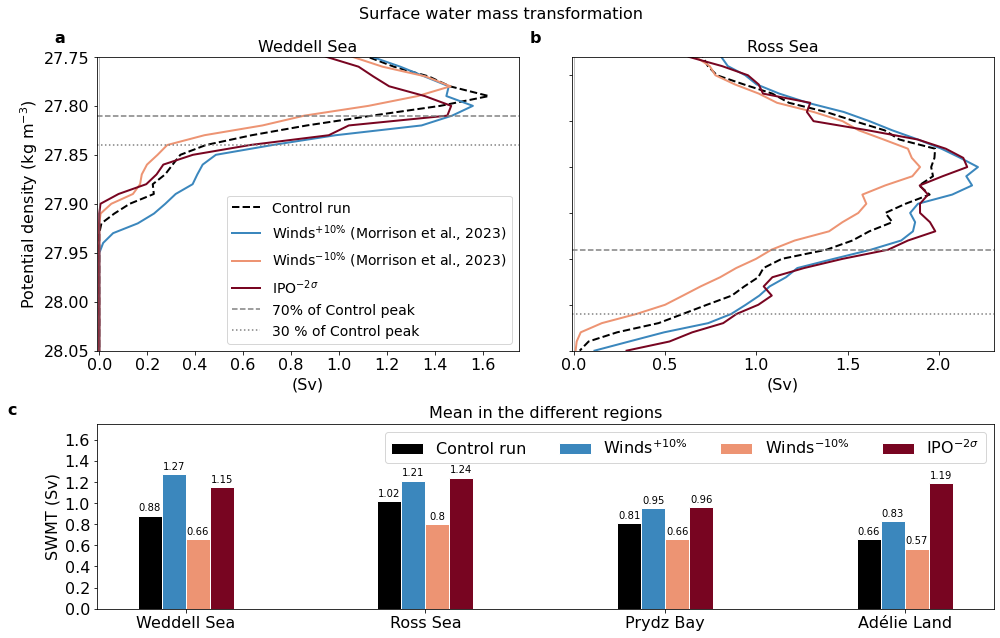

In [6]:
fig = plt.figure(figsize=(14,9),tight_layout=True,facecolor='w',edgecolor='k'); gs = gridspec.GridSpec(2,2, width_ratios = [1,1], height_ratios = [1,.63]) 
# --------------------------------------------------------------------------------------------------------------------------------------------------- #
ax1 = plt.subplot(gs[0,0]); plt.title('Weddell Sea', fontsize=16)#\n surface water mass transformation', fontsize=16)  
#plt.plot(SWMT_IPOCtrl[:,0], SWMT.isopycnal_bins, label='old .exe IPOCtrl', c='g', linewidth=2)
#plt.plot(SWMT_IPOPos[:,0], SWMT.isopycnal_bins, label=legend_label[1], color=rotblau[16]); # plt.fill_between(SWMT_IPOPos[:,0], SWMT.isopycnal_bins, alpha=.2) # for El Niño
#plt.plot(SWMT_IPONeg[:,0], SWMT.isopycnal_bins, label=legend_label[2], color=rotblau[6]); 
#plt.plot(SWMT_IPO2sNeg[:,0], SWMT.isopycnal_bins, label='old .exe IPO2sNeg',  c='r', linewidth=2)

# adding Adele's runs
plt.plot(SWMT_easterlies_control[:,0], SWMT.isopycnal_bins, label='Control run', color='k', lw=2, linestyle='--')
plt.plot(SWMT_easterlies_up10[:,0], SWMT.isopycnal_bins, label=legend_label[5] + ' (Morrison et al., 2023)', color=rotblau[16], lw=2)
plt.plot(SWMT_easterlies_down10[:,0], SWMT.isopycnal_bins, label=legend_label[6] + ' (Morrison et al., 2023)', color=rotblau[6], lw=2)

# adding rerun with Adele's executables
#plt.plot(SWMT_AKM_IPOCtrl[:,0], SWMT.isopycnal_bins, label=legend_label[9], color='k', lw=2, linestyle='--')
plt.plot(SWMT_AKM_IPO2sNeg[:,0], SWMT.isopycnal_bins, label='IPO$^{-2\sigma}$', color=rotblau[1], lw=2)

#plt.plot(SWMT_interannual_control[:,0], SWMT.isopycnal_bins, label=legend_label[8], color='red', lw=5)

#plt.axhline(27.92, lw=.5, c='grey') #\sigma_0 line chosen so that correlation with AABW export acros 1000 m isobath is highest
                                     # same as in Schmidt et al. (2023), JGR Oceans
# _old.exe [62, 64]
# _Adele's.exe [61, 64]
plt.axhline(SWMT.isopycnal_bins[61], color='grey', linestyle='--', label='70% of Control peak') # 70% of the maximum transformation in bin[62]
plt.axhline(SWMT.isopycnal_bins[64], color='grey', linestyle=':', label='30 % of Control peak') # 30% of the maximum transformation in bin[62]...this is according to Morrison et al. (2023) paper

plt.legend(fontsize=14, ncol=1);# plt.axvline(0, lw=.5, c='grey')

plt.xlim([-.01, 1.75])
plt.ylim([27.75, 28.05])
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax1.text(-.1, 1.05, string.ascii_lowercase[0], transform=ax1.transAxes, size=16, weight='bold') # bold panel index letter at the top
plt.xticks(fontsize=16); plt.yticks(fontsize=16) # fontsize of ticks
plt.xlabel('(Sv)', fontsize=16); plt.ylabel('Potential density (kg m$^{-3}$)', fontsize=16); plt.axvline(0, lw=.5, c='grey')
plt.gca().invert_yaxis()

# --------------------------------------------------------------------------------------------------------------------------------------------------- #
ax1 = plt.subplot(gs[0,1]); plt.title('Ross Sea', fontsize=16)#\n surface water mass transformation', fontsize=16)  
#plt.plot(SWMT_IPOCtrl[:,3], SWMT.isopycnal_bins, label='old .exe IPOCtrl', c='g', linewidth=2)
#plt.plot(SWMT_IPOPos[:,3], SWMT.isopycnal_bins, label=legend_label[1], color=rotblau[16]); # plt.fill_between(SWMT_IPOPos[:,0], SWMT.isopycnal_bins, alpha=.2) # for El Niño
#plt.plot(SWMT_IPONeg[:,3], SWMT.isopycnal_bins, label=legend_label[2], color=rotblau[6]); 
#plt.plot(SWMT_IPO2sNeg[:,3], SWMT.isopycnal_bins, label='old .exe IPO2sNeg',  c='r', linewidth=2)

# adding Adele's runs
plt.plot(SWMT_easterlies_control[:,3], SWMT.isopycnal_bins, label='Control run', color='k', lw=2, linestyle='--')
plt.plot(SWMT_easterlies_up10[:,3], SWMT.isopycnal_bins, label=legend_label[5] + ' (Morrison et al., 2023)', color=rotblau[16], lw=2)
plt.plot(SWMT_easterlies_down10[:,3], SWMT.isopycnal_bins, label=legend_label[6] + ' (Morrison et al., 2023)', color=rotblau[6], lw=2)


# adding rerun with Adele's executables
#plt.plot(SWMT_AKM_IPOCtrl[:,3], SWMT.isopycnal_bins, label=legend_label[9], color='k', lw=2, linestyle='--')
plt.plot(SWMT_AKM_IPO2sNeg[:,3], SWMT.isopycnal_bins, label='IPO$^{-2\sigma}$', color=rotblau[1], lw=2)

#plt.plot(SWMT_interannual_control[:,3], SWMT.isopycnal_bins, label=legend_label[8], color='red', lw=5)

plt.axhline(SWMT.isopycnal_bins[79], color='grey', linestyle='--', label='70% of normal state peak') # 70% of the maximum transformation in bin[62]
plt.axhline(SWMT.isopycnal_bins[86], color='grey', linestyle=':', label='30 % of normal state peak') # 30% of the maximum transformation in bin[62]...this is according to Morrison et al. (2023) paper

#plt.legend(fontsize=16)
plt.xlim([-.01, 2.3])
plt.ylim([27.78, 28.1])
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax1.set_yticklabels([]); ax1.set(ylabel=None) # no x axis ticks and labels
plt.xlabel('(Sv)', fontsize=16); plt.xticks(fontsize=16); plt.yticks(fontsize=16); plt.axvline(0, lw=.5, c='grey')

ax1.text(-.1, 1.05, string.ascii_lowercase[1], transform=ax1.transAxes, size=16, weight='bold') # bold panel index letter at the top
plt.gca().invert_yaxis()
plt.suptitle('Surface water mass transformation', fontsize=16)

# --------------------------------------------------------------------------------------------------------------------------------------------------- #
ax1 = plt.subplot(gs[1,:])

labels = ['Weddell Sea', 'Ross Sea', 'Prydz Bay', 'Adélie Land']
#        [   region [0],  region[3],   region[1],     region[2]] 
bar_Ctrl  = [np.round( SWMT_easterlies_control[61:64,0].mean('isopycnal_bins'),2), np.round(SWMT_easterlies_control[79:86,3].mean('isopycnal_bins'),2),
             np.round( SWMT_easterlies_control[58:64,1].mean('isopycnal_bins'),2), np.round(SWMT_easterlies_control[62:68,2].mean('isopycnal_bins'),2)]
bar_up   = [np.round(     SWMT_easterlies_up10[61:64,0].mean('isopycnal_bins'),2),    np.round(SWMT_easterlies_up10[79:86,3].mean('isopycnal_bins'),2), 
             np.round(    SWMT_easterlies_up10[58:64,1].mean('isopycnal_bins'),2),    np.round(SWMT_easterlies_up10[62:68,2].mean('isopycnal_bins'),2)]
bar_down   = [np.round( SWMT_easterlies_down10[61:64,0].mean('isopycnal_bins'),2),  np.round(SWMT_easterlies_down10[79:86,3].mean('isopycnal_bins'),2), 
             np.round(  SWMT_easterlies_down10[58:64,1].mean('isopycnal_bins'),2),  np.round(SWMT_easterlies_down10[62:68,2].mean('isopycnal_bins'),2)]             
bar_2sNeg = [np.round(       SWMT_AKM_IPO2sNeg[61:64,0].mean('isopycnal_bins'),2),       np.round(SWMT_AKM_IPO2sNeg[79:86,3].mean('isopycnal_bins'),2), 
             np.round(       SWMT_AKM_IPO2sNeg[58:64,1].mean('isopycnal_bins'),2),       np.round(SWMT_AKM_IPO2sNeg[62:68,2].mean('isopycnal_bins'),2)]

bar_old_Ctrl = [np.round(SWMT_IPOCtrl[61:64,0].mean('isopycnal_bins'),2),np.round(SWMT_IPOCtrl[79:86,3].mean('isopycnal_bins'),2), 
             np.round(SWMT_IPOCtrl[58:64,1].mean('isopycnal_bins'),2),np.round(SWMT_IPOCtrl[62:68,2].mean('isopycnal_bins'),2)]
bar_old_2sNeg = [np.round(SWMT_IPO2sNeg[61:64,0].mean('isopycnal_bins'),2),np.round(SWMT_IPO2sNeg[79:86,3].mean('isopycnal_bins'),2), 
             np.round(SWMT_IPO2sNeg[58:64,1].mean('isopycnal_bins'),2),np.round(SWMT_IPO2sNeg[62:68,2].mean('isopycnal_bins'),2)]


x = np.arange(len(labels))  # the label locations
width = 0.1 # the width of the bars

rects1 = ax1.bar(x - 3*(width/2), bar_Ctrl,  width, edgecolor='white', label='Control run',  color='k')
rects2 = ax1.bar(x - (width/2), bar_up,   width, edgecolor='white',    label='Winds$^{+10\%}$',   color=rotblau[16])
rects3 = ax1.bar(x + (width/2), bar_down,   width, edgecolor='white',  label='Winds$^{-10\%}$',   color=rotblau[6])
rects4 = ax1.bar(x + 3*(width/2), bar_2sNeg, width, edgecolor='white', label='IPO$^{-2\sigma}$', color=rotblau[1])

#rects5 = ax1.bar(x + 5*(width/2), bar_exe_Ctrl, width, edgecolor='white', label='new .exe Ctrl', color='r')
#rects5 = ax1.bar(x + 7*(width/2), bar_exe_2sNeg, width, edgecolor='white', label='new .exe 2sNeg', color='b')

#rects2 = ax1.bar(x - (width/2), bar_old_Ctrl,   width, edgecolor='white',    label='old .exe Ctrl',   color='g')
#rects3 = ax1.bar(x + (width/2), bar_old_2sNeg,   width, edgecolor='white',  label='old .exe 2sNeg',   color='r')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_ylabel('SWMT (Sv)', fontsize=16)
ax1.set_title('Mean in the different regions', fontsize=16)
ax1.set_xticks(x, labels, fontsize=16); plt.yticks(fontsize=16);
ax1.legend(loc='best', ncol=4, fontsize=16)
plt.ylim([0,1.75])

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax1.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1);autolabel(rects2);autolabel(rects3);autolabel(rects4)#;autolabel(rects6) # labels on top of the bars

ax1.text(-.1, 1.05, string.ascii_lowercase[2], transform=ax1.transAxes, size=16, weight='bold') # bold panel index letter at the top

# --- saving as 300 dpi .PNG image in specified folder -------------------------------------------------------- #
plt.savefig(save + 'SWMT_in_Weddell_and_Ross_Sea_and_IPO_phase_differences_aaa',                                #
            dpi=300, facecolor='w',edgecolor='w', orientation='landscape', papertype=None, format=None,         #
            transparent=False, bbox_inches='tight', pad_inches=0.1, metadata=None)                              #
# --- end of script ------------------------------------------------------------------------------------------- # 
# Wall time: 1.81 s

### Hovmöller Diagrams of SWMT as suggested by Alessandro Silvano

In [6]:
%%time
Weddell_lat = [   0,   239]  # 79°S to 71°S, the western Weddell Sea                   #
Weddell_lon = [2169,  2500]  # 63°W to 30°W or -63°E to -33°E                          #
Ross_lat    = [   0,   239] # 79°S to 71°S, the western Ross Sea                       #
Ross_lon    = [ 819,  1150] # -198°E to -165°E or 198°W to 165°W                       #
#for f in range(1):
#    if f == 0: lon = Weddell_lon; lat = Weddell_lat
#    if f == 1: lon = Ross_lon; lat = Ross_lat
#    ds = xr.open_mfdataset('/g/data/e14/mv7494/IPOAnt_analysis/data_AKM_IPO2sNeg_AABW_final/'+'SWMT_for_sig0_27-2_28-1_01deg_jra55v13_ryf_AKM_IPO2sNeg_1m_**.nc')
#    ds = (ds.binned_salt_transformation + ds.binned_heat_transformation).isel(xt_ocean=slice(lon[0],lon[1])).sum(['isopycnal_bins', 'yt_ocean']).load()
#   
#    if f == 0: ds_Weddell = ds
#    if f == 1: ds_Ross = ds
# Wall time: 47min 55s for all ten years and the two regions
# ds

CPU times: user 9 µs, sys: 0 ns, total: 9 µs
Wall time: 22.9 µs


In [7]:
%%time
base      = '/g/data/e14/mv7494/IPOAnt_analysis/'

exp        = ['01deg_jra55_ryf_IPOCtrl', '01deg_jra55_ryf_IPOPos',
              '01deg_jra55_ryf_IPONeg', '01deg_jra55_ryf_IPOInt',
              '01deg_jra55_ryf_IPO2sNeg', 
              '01deg_jra55_ryf9091_easterlies_up10', '01deg_jra55_ryf9091_easterlies_down10',
              '01deg_jra55v13_ryf_AKM_IPOCtrl', '01deg_jra55v13_ryf_AKM_IPO2sNeg',
              '01deg_jra55v140_iaf_cycle3']


exp_data       = ['data_IPOCtrl_AABW_final', '',
                  '', '',
                  '', 
                  '', '',
                  'data_AKM_IPOCtrl_AABW_final', 'data_AKM_IPO2sNeg_AABW_final',
                  'data_01deg_jra55v140_iaf_cycle3_AABW_final']
                  
#    'data_IPOInt_AABW_final/', 'data_01deg_jra55v140_iaf_cycle3_AABW_final/',
#             'data_AKM_IPO2sNeg_AABW_final/', 'data_IPO2sNeg_AABW_final/', 'data_AKM_IPOCtrl_AABW_final']

#exp_short = ['01deg_jra55_ryf_IPOInt/', '01deg_jra55v140_iaf_cycle3/', 
# '01deg_jra55v13_ryf_AKM_IPO2sNeg', '01deg_jra55v13_ryf_IPO2sNeg', '01deg_jra55v13_ryf_IPOCtrl']

for e in [9]:
    print(exp[e])
    if e in [   9]: time_range = [1958, 2018]
    if e in [0, 8]: time_range = [2152, 2155]
    if e in [7]: time_range = [2150, 2152]
    for f in range(time_range[0], time_range[1]):
        print('doing year ' + str(f))
        filename = base + 'processed/' + exp[e] + '/'+ exp[e] + '_year_' + str(f) + '.nc'
        if f % 10 == 0: print('---------------')
        if os.path.isfile(filename) == True: # check if file already exists, if yes then I can skip that iteration which speeds up my script
            continue 
        else:
            ds_int = xr.open_mfdataset(base + exp_data[e] + '/SWMT_for_sig0_27-2_28-1_' + exp[e] + '_1m_' + str(f) + '.nc')
            ds_int = ((ds_int.binned_salt_transformation + ds_int.binned_heat_transformation) * above1000_tcells)#.mean('yt_ocean')
            ds_int.to_dataset(name='SWMT').to_netcdf(filename) # if file not yet exists, save array to netcdf file
        
    # Wall time: 3min 5s per year
    # Wall time: 30min 27s for ten years
    # Wall time: 3h for all 60 years

01deg_jra55v140_iaf_cycle3
doing year 1958
doing year 1959
doing year 1960
---------------
doing year 1961
doing year 1962
doing year 1963
doing year 1964
doing year 1965
doing year 1966
doing year 1967
doing year 1968
doing year 1969
doing year 1970
---------------
doing year 1971
doing year 1972
doing year 1973
doing year 1974
doing year 1975
doing year 1976
doing year 1977
doing year 1978
doing year 1979
doing year 1980
---------------
doing year 1981
doing year 1982
doing year 1983
doing year 1984
doing year 1985
doing year 1986
doing year 1987
doing year 1988
doing year 1989
doing year 1990
---------------
doing year 1991
doing year 1992
doing year 1993
doing year 1994
doing year 1995
doing year 1996
doing year 1997
doing year 1998
doing year 1999
doing year 2000
---------------
doing year 2001
doing year 2002
doing year 2003
doing year 2004
doing year 2005
doing year 2006
doing year 2007
doing year 2008
doing year 2009
doing year 2010
---------------
doing year 2011
doing year 20

CPU times: user 31.6 s, sys: 25.6 s, total: 57.2 s
Wall time: 23.3 s


Text(0.5, 1.0, 'SWMT over the years in the IAF 1958-2023 simulation')

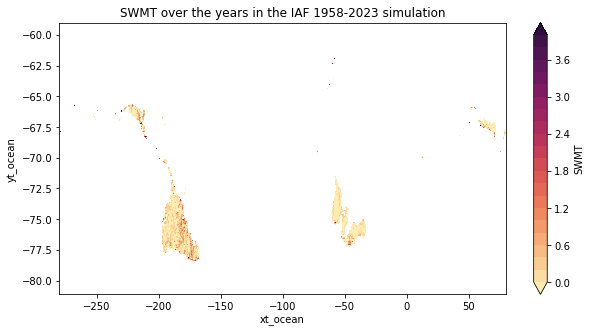

In [9]:
%%time
base = '/g/data/e14/mv7494/IPOAnt_analysis/processed/'

Weddell_SWMT_IPOCtrl     = xr.open_mfdataset(base + '01deg_jra55_ryf_IPOCtrl/'         + '01deg_jra55_ryf_IPOCtrl_year_*.nc').SWMT[(-3*12):,61:,:,:].mean(['time', 'isopycnal_bins'])
#Weddell_SWMT_AKM_IPOCtrl  = xr.open_mfdataset(base + '01deg_jra55v13_ryf_AKM_IPOCtrl/'  + '01deg_jra55v13_ryf_AKM_IPOCtrl_year_*.nc').SWMT[:,61:,:,:]#.mean(['time', 'isopycnal_bins'])
#Weddell_SWMT_AKM_IPOCtrl.time

Weddell_SWMT_AKM_IPO2sNeg = xr.open_mfdataset(base + '01deg_jra55v13_ryf_AKM_IPO2sNeg/' + '01deg_jra55v13_ryf_AKM_IPO2sNeg_year_*.nc').SWMT[(-3*12):,61:,:,:].mean(['time', 'isopycnal_bins'])
Weddell_SWMT_AKM_anoms    = Weddell_SWMT_AKM_IPO2sNeg - Weddell_SWMT_IPOCtrl # calculate the anomalies

plt.figure(figsize=(10,5))
(Weddell_SWMT_AKM_anoms*1e4).plot(levels=np.linspace(0,4,21), cmap=cm.cm.matter) 
plt.title('SWMT over the years in the IAF 1958-2023 simulation')
# Wall time: 25.7s

### Loading in the full interannual SWMT to check with Christina's (2023) paper, Fig. 2.

In [10]:
%%time
ds_IAFFull = xr.open_mfdataset('/g/data/e14/mv7494/IPOAnt_analysis/processed/01deg_jra55v140_iaf_cycle3/'+'01deg_jra55v140_iaf_cycle3_year_*.nc'
                              ).SWMT[:,:73,:,:].mean(['time', 'isopycnal_bins']).load()
# Wall time: 8min 25
# Wall time: 16.1 s when only taking into account one density bin and not all bins higher than a certain density
# Wall time: 1h 52min 5s

CPU times: user 13min 45s, sys: 20min 54s, total: 34min 40s
Wall time: 34min 1s


Text(0.5, 1.0, 'SWMT over the years in the IAF 1958-2023 simulation')

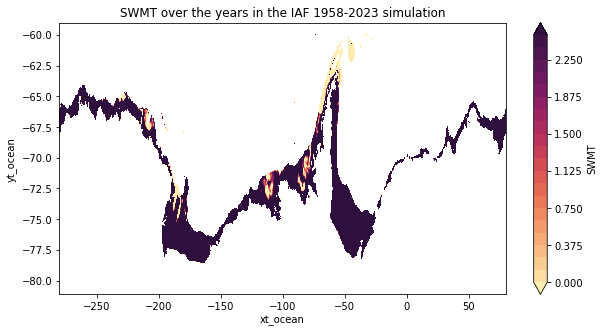

In [11]:
plt.figure(figsize=(10,5))
(ds_IAFFull*1e5).plot(levels=np.linspace(0,2.5,21), cmap=cm.cm.matter)
plt.title('SWMT over the years in the IAF 1958-2023 simulation')
# Wall time: 9min 31s

### Double-checking again the full interannual run

In [ ]:
#%%time
#base2 = '/g/data/e14/mv7494/IPOAnt_analysis/data_01deg_jra55v140_iaf_cycle3_AABW_final/'
#ds    = xr.open_mfdataset(base2 + 'SWMT_for_sig0_27-2_28-1_01deg_jra55v140_iaf_cycle3_1m_*.nc')
#ds    = (ds.binned_salt_transformation + ds.binned_heat_transformation)[:,71:,:,:].mean(['time', 'isopycnal_bins']).load()
# not feasible, takes 3 hours to just load in the data

### Zooming into the Weddell and Ross Seas

01deg_jra55v13_ryf9091
CPU times: user 1min 58s, sys: 2.37 s, total: 2min
Wall time: 2min 10s


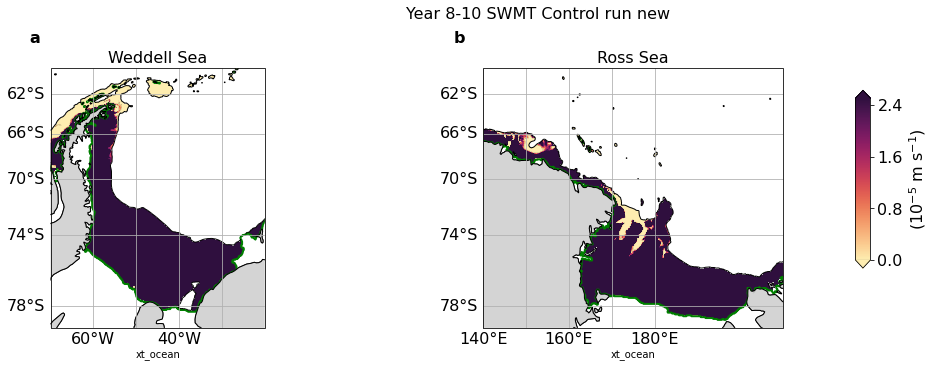

In [12]:
%%time
import matplotlib.ticker as mticker
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
DSW_region = {
    'name': ['Weddell', 'Prydz', 'Adelie', 'Ross'],
    'name_long': ['Weddell Sea', 'Prydz Bay', 'Adélie Coast', 'Ross Sea'],
    'lon': [[-60, -35, -48, -62, -60],
            [48, 73, 74, 48, 48],
            [128-360, 152-360, 152-360, 128-360, 128-360],
            [185-360, 160-360, 164-360, 172-360, 185-360]],
    'lat': [[-71, -75, -78, -75, -71],
            [-65, -66.5, -69, -68, -65],
            [-64.5, -66, -69, -67.5, -64.5],
            [-78, -78, -73, -71.5, -78]],
    'sig0_bins': [27.92, 27.81, 27.81, 28]}
base        = '/g/data/e14/mv7494/IPOAnt_input/'
exp        = ['01deg_jra55_ryf_IPOCtrl', '01deg_jra55_ryf_IPOPos',
              '01deg_jra55_ryf_IPONeg', '01deg_jra55_ryf_IPOInt', '01deg_jra55_ryf_IPO2sNeg', 
              '01deg_jra55v13_ryf9091', '01deg_jra55v13_ryf9091_easterlies_up10', '01deg_jra55v13_ryf9091_easterlies_down10',
              '01deg_jra55v13_ryf_AKM_IPO2sNeg', '01deg_jra55v13_ryf_AKM_IPO2sNeg_anoms']
in_location = ['', 'positive_phase_fields', 'negative_phase_fields', 'interannual_run_fields', '2sigma_negative_phase_fields', 
               '', 'AKM_2sigma_negative_phase_fields']
suffix      = ['Control run', 'IPO$^{+}$', 
               'IPO$^{-}$', 'Interannual run', 'IPO$^{2-}$',
               'Control run new', 'Winds$^{+10\%}$', 'Winds$^{-10\%}$', 
               'IPO$^{2-}$ new', 'IPO$^{2-}$ new anomalies']

var  = [   'u_10',    'v_10']
var2 = ['uas_10m', 'vas_10m']   
var3 = [    'uas',     'vas'] 


# ---------------------------------------------------------------------------------- #
sel_lat    = [   0,  500]  # 81.1°S - 59.5°S                                         #
sel_lon    = [   0, 3600]  # [1299, 2200] = 150°W - 60°W                             #
Wedell_lat = [   0,  270]  # Wedell Sea only                                         #
Wedell_lon = [2150, 2600] # Wedell Sea only                                          #
depth      = [  23,   75]  # 100 m to 1000 m                                         #
# ---------------------------------------------------------------------------------- #

for e in [5]:#,8,9]: #[1,2,4]
    if e == 5: 
        data  = ds_IAFFull * 1e5                               # Full interannual run
        limiten = [0,2.5]; farbskala = cm.cm.matter
    if e == 0: 
        data  = Weddell_SWMT_IPOCtrl * 1e5                               # Control run
        limiten = [0,4]; farbskala = cm.cm.matter
    if e == 8: 
        data  = Weddell_SWMT_AKM_IPO2sNeg * 1e5                          # Perturbation simulation
        limiten = [0,4]; farbskala = cm.cm.matter
    if e == 9: 
        data  = (Weddell_SWMT_AKM_IPO2sNeg - Weddell_SWMT_IPOCtrl) * 1e5 # Anomalies
        limiten = [-2,2]; farbskala = 'RdBu_r'

    fig = plt.figure(figsize=(16,9),tight_layout=True,facecolor='w',edgecolor='k')
    gs = gridspec.GridSpec(1,2); proj = ccrs.PlateCarree()

    print(exp[e])
    
    for a, area_text in enumerate(DSW_region['name']):
        if a in [1, 2]: continue
        if a == 0: # Weddell Sea
            minlon, maxlon, minlat, maxlat = [-70, -20, -79, -59]
            letter = string.ascii_lowercase[0] + ') '
        elif a == 3: # Ross Sea
            minlon, maxlon, minlat, maxlat = [140, 210, -79, -59]
            letter = string.ascii_lowercase[1] + ') '
        
        if a == 0:
            ax = plt.subplot(2, 6, (1, 2), projection=ccrs.Mercator(
                min_latitude=-85, max_latitude=-50,
                latitude_true_scale=-70))
            ax.text(-.1, 1.1,string.ascii_lowercase[0], transform=ax.transAxes, size=16, weight='bold') # c, d, e
        elif a == 3:
            ax = plt.subplot(2, 6, (3, 5), projection=ccrs.Mercator(
                central_longitude=180, min_latitude=-85, max_latitude=-50,
                latitude_true_scale=-70))
            ax.text(-.1, 1.1,string.ascii_lowercase[1], transform=ax.transAxes, size=16, weight='bold') # c, d, e
            
    
        ax.set_extent([minlon, maxlon, minlat, maxlat], proj)
        gl = ax.gridlines(draw_labels=False, crs=proj, alpha=1)
        gl.left_labels = True
        gl.ylabel_style = {'size': 16}
        # gl.bottom_labels = True
        if area_text == 'Weddell':
            gl.xlocator = mticker.FixedLocator(np.arange(-70, -10, 10))
            ax.set_xticks(np.arange(-60, -20, 20), crs=proj); plt.xticks(fontsize=16); 
            # ax.set_yticks(np.arange(-62, -66, -70, -74, -78), crs=proj); plt.yticks(fontsize=16);         
            
            plt.yticks(fontsize=16)
        elif area_text == 'Ross':
            gl.xlocator = mticker.FixedLocator(np.arange(140, 200, 10))
            ax.set_xticks(np.arange(140, 200, 20), crs=proj); plt.xticks(fontsize=16); 
            ax.set_yticklabels([]); ax.set(ylabel=None) 
        ax.xaxis.set_major_formatter(LongitudeFormatter(
            dateline_direction_label=True))
        ax.tick_params(length=0)
        gl.ylocator = mticker.FixedLocator(np.arange(-78, -50, 4))
    
        ax.coastlines(resolution='50m')
    
        plt.contour(b.xu_ocean, b.yu_ocean, b, levels=[1], colors='g', linewidths=2, transform=proj) # green line outlining 'ice shelves' in ACCESS-OM2
    
        ax.add_feature(cfeature.LAND, edgecolor = 'black', facecolor = [.83,.83,.83], zorder = 2)
        plt.contour(field.xu_ocean, field.yu_ocean, field, levels=[1000], colors='k', linewidths=1, transform=proj)   
        
        # plotting here
        #karte = (vi_con_IPOPOs_anom.mean('st_ocean')*mask_DSW[a,:,:]); karte = karte.where(karte != 0) # multiply with mask and set all zeros to NaN
#        karte = (above1000_tcells); karte = karte.where(karte != 0) # multiply with mask and set all zeros to NaN
        p1   = data.plot.pcolormesh(vmin=limiten[0],vmax=limiten[1], add_colorbar=False, extend='max', cmap = farbskala, transform=ccrs.PlateCarree())
        p11  = data.plot.contour(levels = [0], linewidths=.1, cmap='k', transform=ccrs.PlateCarree())

        if a == 0: plt.title('Weddell Sea', fontsize=16)
        if a == 3: plt.title('Ross Sea', fontsize=16)
    
        ax.set_yticklabels([]); ax.set(ylabel=None) 
        if a == 3:    
            pos = ax.get_position()
            cax = plt.axes([pos.xmax+.085, pos.ymin+0.04,
                            0.013, .8*(pos.ymax-pos.ymin)])
            cb = plt.colorbar(p1, cax=cax, orientation='vertical', extend='both')
            cb.ax.set_ylabel('(10$^{-5}$ m s$^{-1}$)', fontsize=16)
            cb.ax.tick_params(labelsize=16); tick_locator = ticker.MaxNLocator(nbins=4)
            cb.locator = tick_locator;cb.update_ticks()
            cb.add_lines(p11) # add contours to colour bar   

    
#        if a == 3: ax.text(-.1, 1.15,string.ascii_lowercase[1], transform=ax1.transAxes, size=16, weight='bold') # c, d, e
    
    plt.suptitle('Year 8-10 SWMT ' + suffix[e], fontsize=16)
    # Wall time: 47.7 s
# --- saving as 300 dpi .PNG image in specified folder -------------------------------------------------------- #
plt.savefig(save + 'SWMT_spatial_maps_experiment_'+ exp[e],                          #
            dpi=300, facecolor='w',edgecolor='w', orientation='landscape', papertype=None, format=None,         #
            transparent=False, bbox_inches='tight', pad_inches=0.1, metadata=None)                              #
# --- end of script ------------------------------------------------------------------------------------------- # 
# Wall time: 7min 20s for three simulations (Ctrl, AKM_2sNeg, AKM_2sNeg-Ctrl)

### Plotting routine for SouthpolarStereo figure

In [9]:
%%time
import matplotlib.path as mpath 
def fancy_plot(ax):
    ax.gridlines(color='grey', linewidth=1, alpha=1, # dots as grid lines
                  xlocs=range(-180, 180, 60), # longitude grid lines
                  ylocs= np.linspace(-45, -90, num=4)) # latitude grid lines
    ax.coastlines(); # add coast lines
    theta = np.linspace(0, 2*np.pi, 100); center, radius = [0.5, 0.5], .5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    ax.set_boundary(circle, transform=ax.transAxes)
    # colour in land and coastlines
    ax.add_feature(cfeature.LAND, edgecolor = 'black', facecolor = [.83,.83,.83], zorder = 2)

CPU times: user 4 µs, sys: 4 µs, total: 8 µs
Wall time: 10.7 µs


CPU times: user 28.3 s, sys: 15.9 s, total: 44.2 s
Wall time: 26.3 s


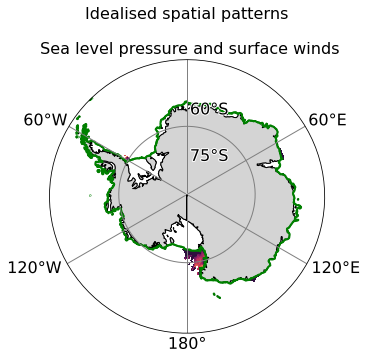

In [11]:
%%time
# ------------------------------------------------------------------- #
# initialise figure
fig = plt.figure(figsize=(14,9),tight_layout=True,facecolor='w',edgecolor='k')
gs = gridspec.GridSpec(2, 3, width_ratios=[1,1,1]) 
     
skala = 30; niveau = [-12,-10,-8,-6,-4,-2,2,4,6,8,10,12]
for f in [2]:
    if f in [2]:
        panel = gs[0,1]; 
        data = ds_SWMT
        titel = 'Idealised spatial patterns\n\n Sea level pressure and surface winds'; ticks = np.linspace(0,5e-4,21); clabel = '(hPa)'
        # uas_10m = xr.open_dataset(base+'sp_mean_anoms_EN.nc').uas_10m
        # vas_10m = xr.open_dataset(base+'sp_mean_anoms_EN.nc').vas_10m; ascii_nr = 1 # number for panel label (bold letter top left)
        
    ax1 = plt.subplot(panel, projection=ccrs.SouthPolarStereo(central_longitude=0))
    ax1.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())
    # --------------------------------------------------------------------------------------------------------------------------- #
    p1 = data.plot.contourf(ax=ax1, levels=ticks, cmap=cm.cm.matter,add_colorbar=False,extend='max',transform=ccrs.PlateCarree())
#    p111 = data.plot.contour(levels = [0], linewidths=.25, cmap='grey', transform=ccrs.PlateCarree())
    # --------------------------------------------------------------------------------------------------------------------------- #
    
#    ax1.text(0, .9, string.ascii_lowercase[ascii_nr], transform=ax1.transAxes, size=16, weight='bold') # bold letter a at the top
    
    fancy_plot(ax1)
    plt.contour(b.xu_ocean, b.yu_ocean, b, levels=[1], colors='g', linewidths=2, transform=ccrs.PlateCarree()) # green line outlining 'ice shelves' in ACCESS-OM2

    if f in [2]:        
        xlab =    [  1.01,    1.04,     .5,   -.055,  -.015,    .58,    .58] # x-position of labels
        ylab =    [   .76,     .22,  -.057,     .22,    .76,    .63,    .80] # y-position of labels
        txt_lab = ['60°E', '120°E', '180°', '120°W', '60°W', '75°S', '60°S'] # label text

        # loop through the 7 labels and surround with white space for higher visibility
        for l in range(len(txt_lab)):
            ax1.text(xlab[l], ylab[l], txt_lab[l], horizontalalignment='center', transform=ax1.transAxes, 
                    fontsize=16).set_path_effects([PathEffects.withStroke(linewidth=2, foreground='w')]) 
    

#    if f in [2,4]:
        # adding 10 m wind data
        # specifics for the wind speed arrows
#        X = uas_10m.lon; Y = uas_10m.lat
#        U = uas_10m; V = vas_10m
        # widths = np.linspace(-.0001, .0001, X.size)
        # Add the wind stress arrows, only plotting every 30th data point.
#        Q = plt.quiver(to_np(X[::7]),   to_np(Y[::7]), 
#                   to_np(U[::7, ::7]), to_np(V[::7, ::7]), 
#                   scale=skala, minshaft = 2, scale_units='height', transform=ccrs.PlateCarree(), width=.005, linewidths=.3, edgecolor=('w')) 
                              # minshaft = select minimum sized arrow (i.e., only those larger than 2)
        # reference key on the map
                            # x0,   y0, scale
#        if f == 2:
#            qk = plt.quiverkey(Q, .75, 0, 1, r'1 m s$^{-1}$', labelpos='E', fontproperties={'size':16}) 

    if f in [2,3]:
        plt.title(titel, fontsize=16) # add title
        
    if f in [4]: # add colour bar 
        cax = fig.add_axes([.411, .0631, .24125, .012]) # position: [x0, y0, width, height]
        cb = plt.colorbar(p1, cax = cax, shrink=.5, orientation='horizontal'); 
        cb.set_label(label=clabel, size=16)
        cb.ax.tick_params(labelsize=16); tick_locator = ticker.MaxNLocator(nbins=4)
        cb.locator = tick_locator;cb.update_ticks(); cb.add_lines(p111) # add contours to colour bar

# plt.suptitle('Idealised time series                                 Idealised spatial patterns\n', fontsize=16)            
# --- saving as 300 dpi .PNG image in specified folder ------------- #
#plt.savefig(save + filename+'_slp_winds_only', dpi=300, facecolor='w',                 #
#            edgecolor='w', orientation='landscape', papertype=None,  #
#            format=None, transparent=False, bbox_inches=None,        #
#            pad_inches=0.1, metadata=None)                           #
# --- end of script ------------------------------------------------ # 
# Wall time: 30.3 s

CPU times: user 2min 11s, sys: 42.2 s, total: 2min 54s
Wall time: 2min 53s


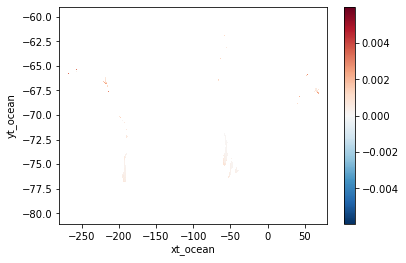

In [9]:
%%time
ds_int = xr.open_mfdataset(base + exp[e] + 'SWMT_for_sig0_27-2_28-1_01deg_' + exp_short[e] + str(f) + '.nc')
ds_int = ((ds_int.binned_salt_transformation + ds_int.binned_heat_transformation)[:,71:] * above1000_tcells)#.mean('time')#.mean('yt_ocean')
ds_int.mean(['time', 'isopycnal_bins']).plot()

In [ ]:
%%time
(ds_int*above1000_tcells).mean('yt_ocean').to_netcdf(base+'test/'+'SWMT_year_')

In [ ]:
ds_int.mean('yt_ocean').plot()

In [ ]:

plt.figure(figsize=(2,8))
ds_Ross.plot()#levels=np.linspace(-5e-5,0,21))

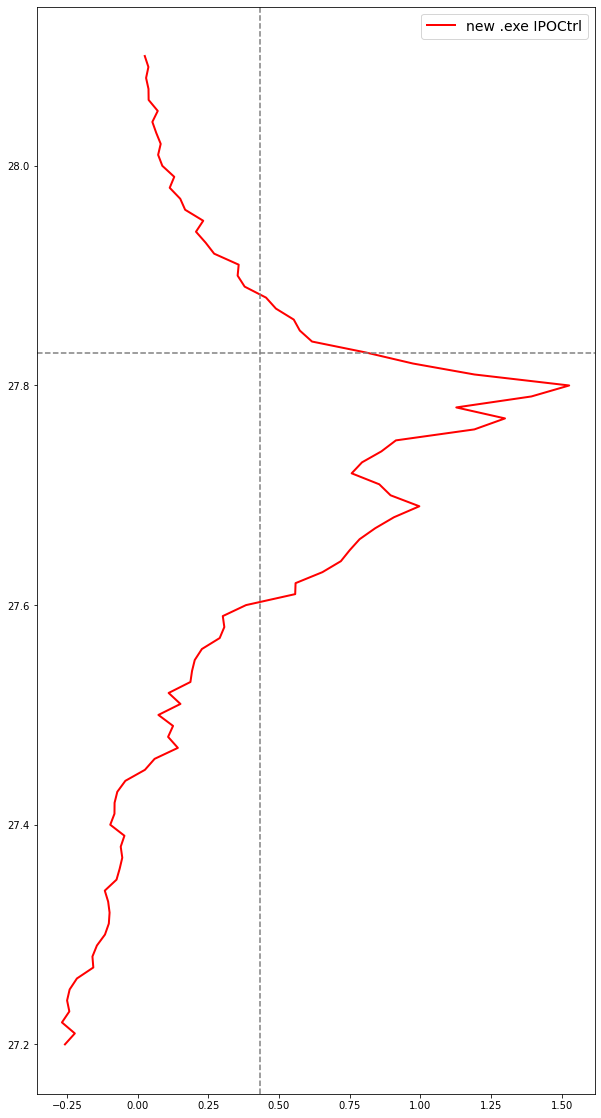

In [9]:
plt.figure(figsize=(10,20))
# adding rerun with Adele's executables
plt.plot(SWMT_AKM_IPOCtrl[:,2], SWMT.isopycnal_bins, label=legend_label[9], color='r', lw=2)
#plt.plot(SWMT_AKM_IPO2sNeg[:,0], SWMT.isopycnal_bins, label=legend_label[10], color='b', lw=2)
plt.legend(fontsize=14, ncol=2);# plt.axvline(0, lw=.5, c='grey')

plt.axvline(SWMT_AKM_IPO2sNeg[:,2].max()*.3, color='grey', linestyle='--', label='70% of Control peak') # 70% of the maximum transformation in bin[62]
plt.axhline(SWMT.isopycnal_bins[63], color='grey', linestyle='--', label='70% of Control peak') # 70% of the maximum transformation in bin[62]

In [ ]:
plt.axhline(SWMT.isopycnal_bins[], color='grey', linestyle=':', label='50 % of Control peak') # 30% of the maximum transformation in bin[62]...this is according to Morrison et al. (2023) paper


plt.gca().invert_yaxis()
plt.legend()

In [ ]:
plt.figure(figsize=(16,9)); gs = gridspec.GridSpec(2,2, width_ratios = [1,1], height_ratios = [1,.5]) 
# --------------------------------------------------------------------------------------------------------------------------------------------------- #
ax1 = plt.subplot(gs[0,0]); plt.title('SWMT in the Weddell Sea', fontsize=16)  
plt.plot(SWMT_interannual_control[:,0], SWMT.isopycnal_bins, label=SWMT_interannual_control[:,0].area.values)
plt.plot(SWMT_interannual_control[:,1], SWMT.isopycnal_bins, label=SWMT_interannual_control[:,1].area.values)
plt.plot(SWMT_interannual_control[:,2], SWMT.isopycnal_bins, label=SWMT_interannual_control[:,2].area.values)
plt.plot(SWMT_interannual_control[:,3], SWMT.isopycnal_bins, label=SWMT_interannual_control[:,3].area.values)
plt.legend(fontsize=16);# plt.axvline(0, lw=.5, c='grey')
#plt.xlim([-.01, 1.75]); plt.ylim([27.2, 28.05])
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax1.text(-.1, 1.05, string.ascii_lowercase[0], transform=ax1.transAxes, size=16, weight='bold') # bold panel index letter at the top
plt.xticks(fontsize=16); plt.yticks(fontsize=16) # fontsize of ticks
plt.xlabel('(Sv)', fontsize=16); plt.ylabel('Potential density (kg m$^{-3}$)', fontsize=16); plt.axvline(0, lw=.5, c='grey')
plt.gca().invert_yaxis()
plt.grid()
plt.autoscale(enable=True, axis='both', tight=True)

### Interannual figure

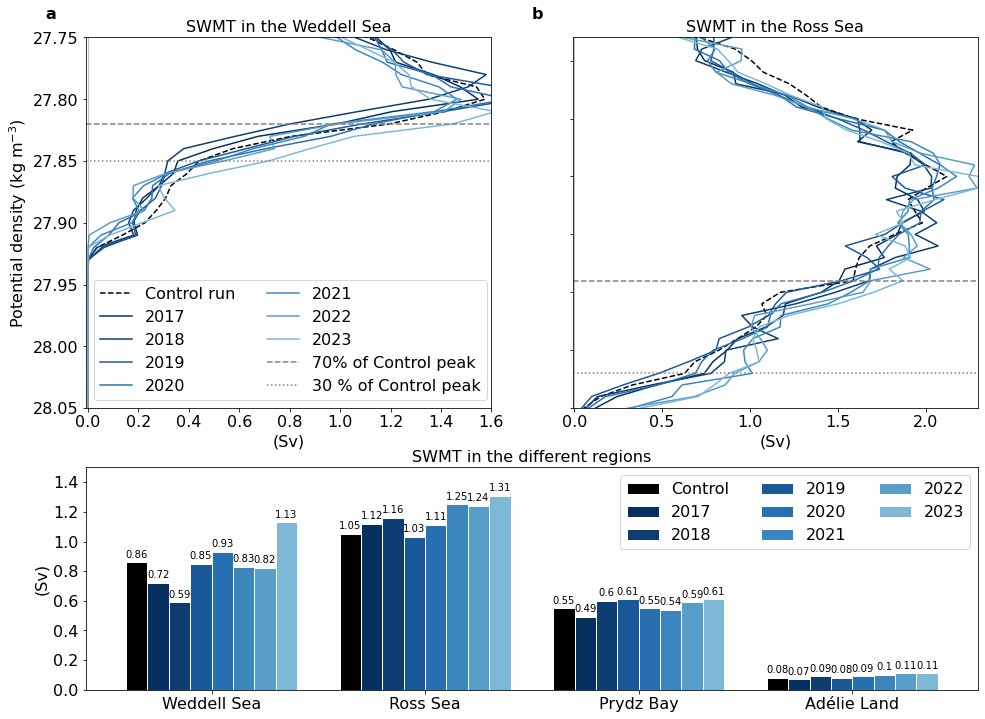

In [36]:
plt.figure(figsize=(16,12)); gs = gridspec.GridSpec(2,2, width_ratios = [1,1], height_ratios = [1,.6]) 
# --------------------------------------------------------------------------------------------------------------------------------------------------- #
ax1 = plt.subplot(gs[0,0]); plt.title('SWMT in the Weddell Sea', fontsize=16)  
plt.plot(SWMT_IPOCtrl[:,0], SWMT.isopycnal_bins, label=legend_label[0], c='k', linestyle='--')
for f in range(7): plt.plot(SWMT_IPOInt[f,:,0], SWMT.isopycnal_bins, label=str(2017+f), color=rotblau[20-f])

plt.axhline(SWMT.isopycnal_bins[62], color='grey', linestyle='--', label='70% of Control peak') # 70% of the maximum transformation in bin[62]
plt.axhline(SWMT.isopycnal_bins[65], color='grey', linestyle=':', label='30 % of Control peak') # 30% of the maximum transformation in bin[62]...this is according to Morrison et al. (2023) paper
plt.legend(fontsize=16, ncol=2);# plt.axvline(0, lw=.5, c='grey')

plt.xlim([-.01, 1.6])
plt.ylim([27.75, 28.05])
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax1.text(-.1, 1.05, string.ascii_lowercase[0], transform=ax1.transAxes, size=16, weight='bold') # bold panel index letter at the top
plt.xticks(fontsize=16); plt.yticks(fontsize=16) # fontsize of ticks
plt.xlabel('(Sv)', fontsize=16); plt.ylabel('Potential density (kg m$^{-3}$)', fontsize=16); plt.axvline(0, lw=.5, c='grey')
plt.gca().invert_yaxis()

# --------------------------------------------------------------------------------------------------------------------------------------------------- #
ax1 = plt.subplot(gs[0,1]); plt.title('SWMT in the Ross Sea', fontsize=16)
plt.plot(SWMT_IPOCtrl[:,3], SWMT.isopycnal_bins, label=legend_label[0], c='k', linestyle='--')
for f in range(7): plt.plot(SWMT_IPOInt[f,:,3], SWMT.isopycnal_bins, label=str(2017+f), color=rotblau[20-f])

plt.axhline(SWMT.isopycnal_bins[79], color='grey', linestyle='--', label='70% of Control peak') # 70% of the maximum transformation in bin[62]
plt.axhline(SWMT.isopycnal_bins[87], color='grey', linestyle=':', label='30 % of Control peak') # 30% of the maximum transformation in bin[62]...this is according to Morrison et al. (2023) paper

#plt.legend(fontsize=16)
plt.xlim([-.01, 2.3])
plt.ylim([27.78, 28.1])
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax1.set_yticklabels([]); ax1.set(ylabel=None) # no x axis ticks and labels
plt.xlabel('(Sv)', fontsize=16); plt.xticks(fontsize=16); plt.yticks(fontsize=16); plt.axvline(0, lw=.5, c='grey')

ax1.text(-.1, 1.05, string.ascii_lowercase[1], transform=ax1.transAxes, size=16, weight='bold') # bold panel index letter at the top
plt.gca().invert_yaxis()

# --------------------------------------------------------------------------------------------------------------------------------------------------- #
ax1 = plt.subplot(gs[1,:])

labels = ['Weddell Sea', 'Ross Sea', 'Prydz Bay', 'Adélie Land']
bar_Ctrl  = [np.round( SWMT_IPOCtrl[62:65,0].mean('isopycnal_bins'),2), np.round(SWMT_IPOCtrl[79:87,3].mean('isopycnal_bins'),2),
             np.round( SWMT_IPOCtrl[62:65,1].mean('isopycnal_bins'),2), np.round(SWMT_IPOCtrl[79:87,2].mean('isopycnal_bins'),2)]
for f in range(7):
    bar_IPOInt   = [np.round(  SWMT_IPOInt[f,62:65,0].mean('isopycnal_bins'),2), np.round(SWMT_IPOInt[f,79:87,3].mean('isopycnal_bins'),2), 
                    np.round(  SWMT_IPOInt[f,62:65,1].mean('isopycnal_bins'),2), np.round(SWMT_IPOInt[f,79:87,2].mean('isopycnal_bins'),2)]
    if f == 0: bar_2017 = bar_IPOInt
    if f == 1: bar_2018 = bar_IPOInt
    if f == 2: bar_2019 = bar_IPOInt
    if f == 3: bar_2020 = bar_IPOInt
    if f == 4: bar_2021 = bar_IPOInt
    if f == 5: bar_2022 = bar_IPOInt
    if f == 6: bar_2023 = bar_IPOInt                                  

x = np.arange(len(labels))  # the label locations
width = 0.1 # the width of the bars

rects1 = ax1.bar(x - 7*(width/2), bar_Ctrl,  width, edgecolor='white', label='Control',  color='k')
rects2 = ax1.bar(x - 5*(width/2), bar_2017,   width, edgecolor='white', label='2017', color=rotblau[20])
rects3 = ax1.bar(x - 3*(width/2), bar_2018,   width, edgecolor='white', label='2018', color=rotblau[19])
rects4 = ax1.bar(x -   (width/2), bar_2019,   width, edgecolor='white', label='2019', color=rotblau[18])
rects5 = ax1.bar(x +   (width/2), bar_2020,   width, edgecolor='white', label='2020', color=rotblau[17])
rects6 = ax1.bar(x + 3*(width/2), bar_2021,   width, edgecolor='white', label='2021', color=rotblau[16])
rects7 = ax1.bar(x + 5*(width/2), bar_2022,   width, edgecolor='white', label='2022', color=rotblau[15])
rects8 = ax1.bar(x + 7*(width/2), bar_2023,   width, edgecolor='white', label='2023', color=rotblau[14])


# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_ylabel('(Sv)', fontsize=16)
ax1.set_title('SWMT in the different regions', fontsize=16)
ax1.set_xticks(x, labels, fontsize=16); plt.yticks(fontsize=16);
ax1.legend(loc='best', ncol=3, fontsize=16)
plt.ylim([0,1.5])

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax1.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1); autolabel(rects2); autolabel(rects3); autolabel(rects4) # labels on top of the bars
autolabel(rects5); autolabel(rects6); autolabel(rects7); autolabel(rects8)

# --- saving as 300 dpi .PNG image in specified folder -------------------------------------------------------- #
plt.savefig(save + 'SWMT_in_Weddell_and_Ross_Sea_and_IPO_interannual',                                          #
            dpi=300, facecolor='w',edgecolor='w', orientation='landscape', papertype=None, format=None,         #
            transparent=False, bbox_inches='tight', pad_inches=0.1, metadata=None)                              #
# --- end of script ------------------------------------------------------------------------------------------- # 
# Wall time: 1.81 s

# Looking at spatial patterns of the IPOCtrl simulation now

In [19]:
# find 50% peak of the control run for each region as in Adele's paper
half_peak = np.zeros(4)
for f in range(4):
    half_peak[f] = (SWMT_IPOCtrl[:,f].max()*.5).values
half_peak # Weddell, Prydz, Adelie, Ross

bins_50percent = [63, 60, 63, 83] # so for Weddell, SWMT 50% is SWMT_IPOCtrl.isopycnal_bins[63] = 27.83 kg m^-3 bin
# Weddell                                                                        27.83 kg m^-3
# Prydz                                                                          27.80 kg m^-3
# Adelie                                                                         27.83 kg m^-3
# Ross                                                                           28.03 kg m^-3
# next, I need to select the climatological SWMT across these bins for each region and stich them together for Fig. 4a in Morrison et al. (2023)

In [20]:
%%time
for f in range(4):
    base = '/g/data/e14/mv7494/IPOAnt_analysis/'
    exp = ['data_IPOCtrl_AABW_final']
    # open the files 10 years at a time
    
    ds = xr.open_mfdataset(base + exp[0] + '/SWMT_for_sig0_27-2_28-1_01deg_jra55_ryf_IPOCtrl_1m_2154.nc')
    ds = (ds.binned_salt_transformation)[-24:,bins_50percent[f],:,:].mean('time')#.load() # select SWMT across 27.92 kg/m3 density bin

    if f == 0: ds_weddell = ds
    if f == 1: ds_prydz = ds
    if f == 2: ds_adelie = ds
    if f == 3: ds_ross = ds

#    ds = (ds.binned_salt_transformation + ds.binned_heat_transformation)[-24:,63,:,:].mean('time')#.load() # select SWMT across 27.92 kg/m3 density bin
    # Wall time: 2min 37sds
ds_combined = ds.fillna(np.nan)

CPU times: user 43.9 ms, sys: 5.08 ms, total: 49 ms
Wall time: 47.3 ms


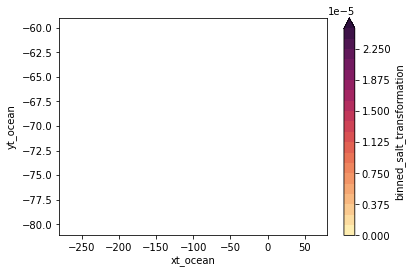

In [23]:
(ds_weddell + ds_prydz + ds_adelie + ds_ross).plot(levels=np.linspace(0,2.5e-5,21), cmap=cm.cm.matter)

In [74]:
ds_combined.values

KeyboardInterrupt: 

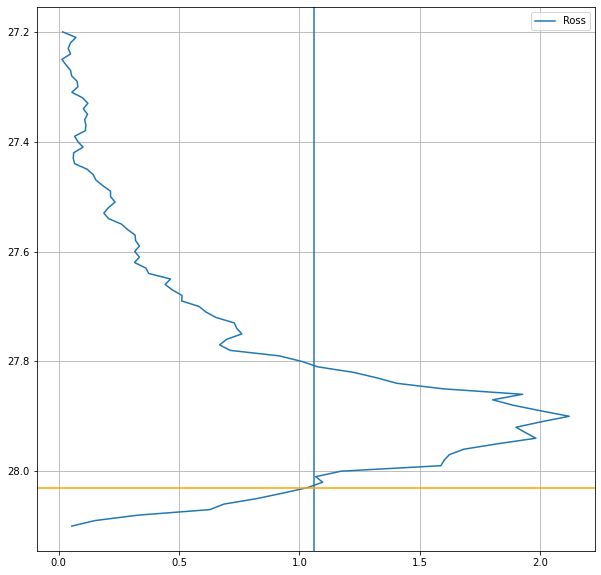

In [61]:
plt.figure(figsize=(10,10))
plt.plot(SWMT_IPOCtrl[:,3], SWMT_IPOCtrl.isopycnal_bins, label=SWMT_IPOCtrl[:,3].area.values)
plt.gca().invert_yaxis(); plt.grid(); plt.legend()
plt.axvline(half_peak[3])
plt.axhline(SWMT_IPOCtrl.isopycnal_bins[83], c='orange')

In [27]:
# next, finding the bins which correspond to these 50% SWMT values
SWMT_IPOCtrl[50,0].values

array(0.66317907)

In [7]:
%%time
base = '/g/data/e14/mv7494/IPOAnt_analysis/'
exp = ['data_IPO2sNeg_AABW_final']
# open the files 10 years at a time

ds = xr.open_mfdataset(base + exp[0] + '/SWMT_for_sig0_27-2_28-1_01deg_jra55_ryf_IPO2sNeg_1m_2154.nc')
ds = (ds.binned_salt_transformation + ds.binned_heat_transformation)[-24:,79:,:,:].mean('time').load() # select SWMT across 27.92 kg/m3 density bin
# Wall time: 2min 37s

CPU times: user 1min 57s, sys: 38.7 s, total: 2min 35s
Wall time: 2min 37s


AttributeError: 'Rectangle' object has no property 'levels'

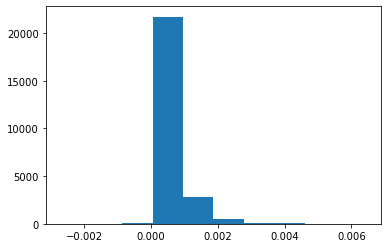

In [10]:
ds.plot(levels=np.linspace(0,2.5e-5,21), cmap=cm.cm.matter)
# Wall time: 8min 33s
# oh nice, this seems to work now -> Weddell Sea SWMT across Christina's same density bin

In [8]:
    # if file already exists, skip this iteration of the loop
    if os.path.exists(base+'annual_mean_data_01deg_jra55v140_iaf_cycle3_AABW_final/'+'spatial_map_IPOIAF_'+str(f)+'.nc'):
        print('SWMT map for year '+str(f)+' already done')
        continue
    else:
        print('Doing SWMT map for year '+str(f))
        ds.to_dataset(name='SWMT_all_density_bins').to_netcdf(base+'annual_mean_data_01deg_jra55v140_iaf_cycle3_AABW_final/'+'spatial_map_IPOIAF_'+str(f)+'.nc')
    # Wall time: 8min 18s for three years
    # Wall time: 13min 57s
    # Wall time: 3min 8s for one year

SyntaxError: 'continue' not properly in loop (2619070811.py, line 4)

In [ ]:
%%time
base = '/g/data/e14/mv7494/IPOAnt_analysis/'
exp = ['data_01deg_jra55v140_iaf_cycle3_AABW_final']
# open the files 10 years at a time

for f in [1959]:#range(1958,2019):
    ds = xr.open_mfdataset(base + exp[0] + '/SWMT_for_sig0_27-2_28-1_01deg_jra55v140_iaf_cycle3_1m_'+str(f)+'.nc')
    ds = (ds.binned_salt_transformation + ds.binned_heat_transformation).mean(['time', 'isopycnal_bins'])

    # if file already exists, skip this iteration of the loop
    if os.path.exists(base+'annual_mean_data_01deg_jra55v140_iaf_cycle3_AABW_final/'+'spatial_map_IPOIAF_'+str(f)+'.nc'):
        print('SWMT map for year '+str(f)+' already done')
        continue
    else:
        print('Doing SWMT map for year '+str(f))
        ds.to_dataset(name='SWMT_all_density_bins').to_netcdf(base+'annual_mean_data_01deg_jra55v140_iaf_cycle3_AABW_final/'+'spatial_map_IPOIAF_'+str(f)+'.nc')
    # Wall time: 8min 18s for three years
    # Wall time: 13min 57s
    # Wall time: 3min 8s for one year

In [ ]:
%%time
plt.figure(figsize=(20,4))
#SWMT_IPOCtrl  = xr.open_mfdataset('/g/data/e14/mv7494/IPOAnt_analysis/'+'spatial_map_IPOCtrl.nc')
SWMT_IPO2sNeg = xr.open_mfdataset('/g/data/e14/mv7494/IPOAnt_analysis/'+'spatial_map_IPO2sNeg.nc')
((SWMT_IPO2sNeg)*above1000_tcells).SWMT_all_density_bins.plot(levels=np.linspace(0,2.5e-5, 21), cmap=cm.cm.matter, extend='max')
plt.title('SWMT anoms IPO2sNeg (Sv)', fontsize=16)

In [ ]:
%%time
da = xr.DataArray(coords=(range(60),range(510), range(3600)))   
da['dim_1'] = SWMT_IPOIAF.yt_ocean.values; da['dim_2'] = SWMT_IPOIAF.xt_ocean.values
da = da.rename({'dim_0': 'time', 'dim_1': 'yt_ocean', 'dim_2': 'xt_ocean'})

plt.figure(figsize=(20,4))
for f in range(60):
    if f % 5 == 0: print(f+1958)
    ds = xr.open_mfdataset('/g/data/e14/mv7494/IPOAnt_analysis/annual_mean_data_01deg_jra55v140_iaf_cycle3_AABW_final/' + 'spatial_map_IPOIAF_'+str(f+1958)+'.nc')
    ds = (ds*above1000_tcells).SWMT_all_density_bins
    da[f,:,:] = ds.values
da.mean('time').plot(levels=np.linspace(0,2.5e-5, 21), cmap=cm.cm.matter, extend='max')  

In [ ]:
plt.figure(figsize=(20,4))
SWMT_IPOIAF  = xr.open_mfdataset('/g/data/e14/mv7494/IPOAnt_analysis/annual_mean_data_01deg_jra55v140_iaf_cycle3_AABW_final/' + 'spatial_map_IPOIAF_2018.nc', decode_times=False)
((SWMT_IPOIAF)*above1000_tcells).SWMT_all_density_bins.plot(levels=np.linspace(0,2.5e-5, 21), cmap=cm.cm.matter, extend='max')
plt.title('SWMT anoms IPO2sNeg (Sv)', fontsize=16)

In [78]:
SWMT_IPOIAF

<xarray.Dataset>
Dimensions:                (yt_ocean: 510, xt_ocean: 3600)
Coordinates:
  * yt_ocean               (yt_ocean) float64 -81.11 -81.07 ... -59.08 -59.03
  * xt_ocean               (xt_ocean) float64 -279.9 -279.8 ... 79.85 79.95
Data variables:
    SWMT_all_density_bins  (yt_ocean, xt_ocean) float64 dask.array<chunksize=(510, 3600), meta=np.ndarray>

### This takes too long

In [ ]:
%%time
base = '/g/data/e14/mv7494/IPOAnt_analysis/'
exp = ['data_01deg_jra55v140_iaf_cycle3_AABW_final']
# open the files 10 years at a time

for e in [0]: # loop through the two simulations ENFull and LNFull
    print(exp[e])
    if e == 0: last_output = 2018; nr_outputs = 10 # for ENFull, I only have output976-output980

    a = [i for i in range(last_output+1-nr_outputs,last_output+1)] # create integer list
    s = list(range(0,nr_outputs))
    c = []; d = []; t = []; u = []; q = [] # empty list which I fill up; c for control, d for perturbation simulation
    for i in s: # loop through the number of files I would like
        # fill in empty list with integers trailing two zeros (000, 001, 002, ...)
        c.append(i); c[i] = base + exp[0] + '/SWMT_for_sig0_27-2_28-1_01deg_jra55v140_iaf_cycle3_1m_' + str(a[i]).zfill(3) + '.nc'
ds = xr.open_mfdataset(c,combine='by_coords',chunks = {'yt_ocean': '200MB', 'xt_ocean': '200MB'}, decode_times = True)
ds = (ds.binned_salt_transformation + ds.binned_heat_transformation).mean(['time', 'isopycnal_bins'])
for f in range(1):
    # if file already exists, skip this iteration of the loop
    if os.path.exists('/g/data/e14/mv7494/IPOAnt_analysis/'+'spatial_map_IPOIAF'+str(last_output-10)+'_'+str(last_output)+'.nc'):
        print('Spatial SWMT maps are already done')
        continue
    else:
        print('Doing spatial SWMT maps ')
        ds.to_dataset(name='SWMT_all_density_bins').to_netcdf('/g/data/e14/mv7494/IPOAnt_analysis/'+'spatial_map_IPOIAF_'+str(last_output-10)+'_'+str(last_output)+'.nc')
    # Wall time: 8min 18s for three years
    # Wall time: 13min 57s

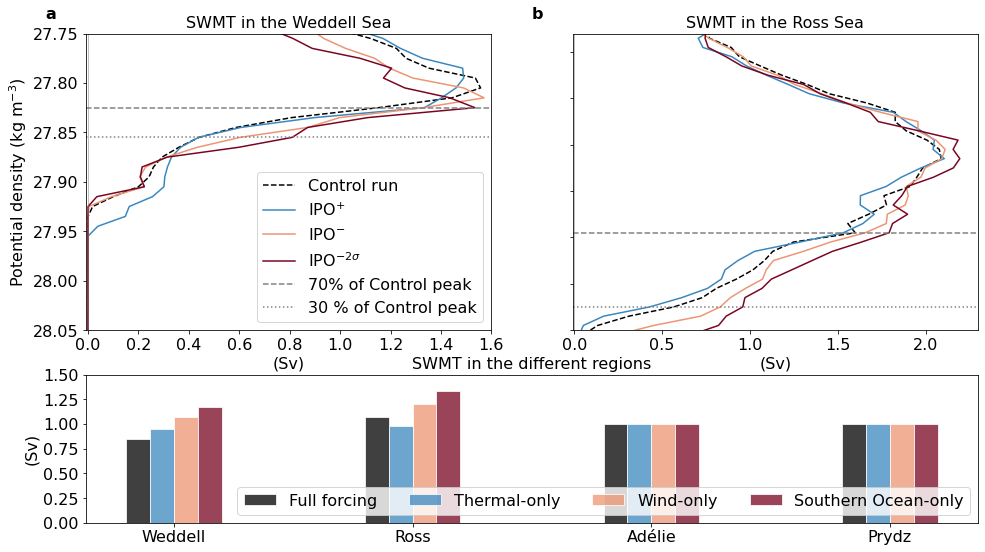

In [ ]:
species = ("Weddell", "Ross", "Adélie", 'Prydz')
bar_Ctrl  = [np.round(SWMT_IPOCtrl[62:65,0].mean('isopycnal_bins'),2), np.round(SWMT_IPOCtrl[79:87,3].mean('isopycnal_bins'),2), 1, 1]
bar_Pos   = [np.round(SWMT_IPOPos[62:65,0].mean('isopycnal_bins'),2), np.round(SWMT_IPOPos[79:87,3].mean('isopycnal_bins'),2), 1, 1]
bar_Neg   = [np.round(SWMT_IPONeg[62:65,0].mean('isopycnal_bins'),2), np.round(SWMT_IPONeg[79:87,3].mean('isopycnal_bins'),2), 1, 1]
bar_2sNeg = [np.round(SWMT_IPO2sNeg[62:65,0].mean('isopycnal_bins'),2), np.round(SWMT_IPO2sNeg[79:87,3].mean('isopycnal_bins'),2), 1, 1]

# set width of bar
barWidth = 0.1
# set height of bar

# Set position of bar on X axis
r1 = np.arange(4)
r2 = [x + barWidth for x in r1]; r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]; r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]

# Make the plot
plt.bar(r1, bar_Ctrl, color='k', width=barWidth, edgecolor='white', label='Full forcing', alpha=.75)
plt.bar(r2, bar_Pos, color=rotblau[16], width=barWidth, edgecolor='white', label='Thermal-only', alpha=.75)   
plt.bar(r3, bar_Neg, color=rotblau[6], width=barWidth, edgecolor='white', label='Wind-only', alpha=.75)
plt.bar(r4, bar_2sNeg, color=rotblau[1], width=barWidth, edgecolor='white', label='Southern Ocean-only', alpha=.75)
ax1.axhline(y= 0, c = 'grey', linewidth = .5, alpha = .9)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_title('SWMT in the different regions', fontsize=16)
ax1.set_xticks(x + width, species)
ax1.legend(loc='lower right', ncol=4, fontsize=16)
ax1.set_ylim(0, 1.5)
plt.ylabel('(Sv)', fontsize=16); plt.xticks(fontsize=16); plt.yticks(fontsize=16);

#plt.plot((SWMT_IPOPos - SWMT_IPONeg)[:,0], SWMT.isopycnal_bins, label=region[0], color='g')
#plt.plot((SWMT_IPOPos - SWMT_IPONeg)[:,3], SWMT.isopycnal_bins, label=region[1], color='b')

#plt.gca().invert_yaxis(); plt.legend(fontsize=16); plt.axvline(0, lw=.5, c='grey')
#ax1.set_yticklabels([]); ax1.set(ylabel=None) # no x axis ticks and labels
#plt.xlabel('SWMT (Sv)', fontsize=16); plt.xticks(fontsize=16); plt.yticks(fontsize=16) # fontsize of ticks
#ax1.text(-.1, 1.05, string.ascii_lowercase[2], transform=ax1.transAxes, size=16, weight='bold') # bold panel index letter at the top

# --- saving as 300 dpi .PNG image in specified folder -------------------------------------------------------- #
plt.savefig(save + 'SWMT_in_Weddell_and_Ross_Sea_and_IPO_phase_differences',                                #
            dpi=300, facecolor='w',edgecolor='w', orientation='landscape', papertype=None, format=None,         #
            transparent=False, bbox_inches='tight', pad_inches=0.1, metadata=None)                              #
# --- end of script ------------------------------------------------------------------------------------------- # 
# Wall time: 1.81 s

In [ ]:
plt.bar(r2, myList_TempRad, color=rotblau[20], width=barWidth, edgecolor='white', label='Thermal-only', alpha=.75)   
        plt.bar(r3, myList_Wind, color=rotblau[16], width=barWidth, edgecolor='white', label='Wind-only', alpha=.75)
        plt.bar(r4, myList_Southern, color=rotblau[1], width=barWidth, edgecolor='white', label='Southern Ocean-only', alpha=.75)
        plt.bar(r5, myList_Tropics30SN, color=rotblau[6], width=barWidth, edgecolor='white', label='Tropics-only 30°S-30°N', alpha=.75)
    if s == 1:
        plt.bar(r2, myList_Pacific, color=rotblau[20], width=barWidth, edgecolor='white', label='Pacific-only', alpha=.75)
        plt.bar(r3, myList_Indian, color=rotblau[16], width=barWidth, edgecolor='white', label='Indian-only', alpha=.75)
        plt.bar(r4, myList_Atlantic, color=rotblau[13], width=barWidth, edgecolor='white', label='Atlantic-only', alpha=.75)
    ax1.axhline(y= 0, c = 'grey', linewidth = .5, alpha = .9)


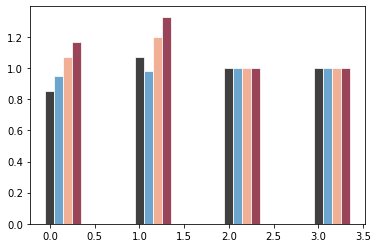

<Figure size 1440x720 with 0 Axes>

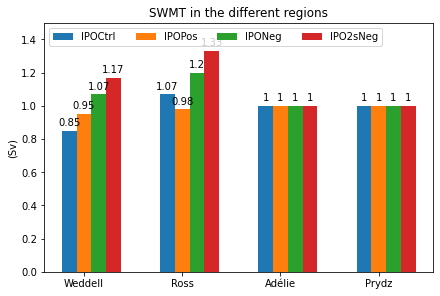

In [18]:
species = ("Weddell", "Ross", "Adélie", 'Prydz')
penguin_means = {
    'IPOCtrl': (np.round(SWMT_IPOCtrl[62:65,0].mean('isopycnal_bins'),2), np.round(SWMT_IPOCtrl[79:87,3].mean('isopycnal_bins'),2), 1, 1),
    'IPOPos':  (np.round(SWMT_IPOPos[62:65,0].mean('isopycnal_bins'),2),  np.round(SWMT_IPOPos[79:87,3].mean('isopycnal_bins'),2), 1, 1),
    'IPONeg':  (np.round(SWMT_IPONeg[62:65,0].mean('isopycnal_bins'),2),  np.round(SWMT_IPONeg[79:87,3].mean('isopycnal_bins'),2), 1, 1),
    'IPO2sNeg':  (np.round(SWMT_IPO2sNeg[62:65,0].mean('isopycnal_bins'),2),  np.round(SWMT_IPO2sNeg[79:87,3].mean('isopycnal_bins'),2), 1, 1),
    
}

x = np.arange(len(species))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

plt.figure(figsize=(20,10))
fig, ax = plt.subplots(layout='constrained')

farben = [rotblau[3], rotblau[6], rotblau[9], rotblau[12], rotblau[15]]
for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('(Sv)')
ax.set_title('SWMT in the different regions')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncol=4)
ax.set_ylim(0, 1.5)

plt.show()

Text(0, 0.5, '(Sv)')

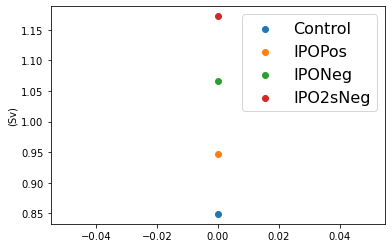

In [11]:
plt.scatter(0,SWMT_IPOCtrl[62:65,0].mean('isopycnal_bins'), label='Control')
plt.scatter(0,SWMT_IPOPos[62:65,0].mean('isopycnal_bins'), label='IPOPos')
plt.scatter(0,SWMT_IPONeg[62:65,0].mean('isopycnal_bins'), label='IPONeg')
plt.scatter(0,SWMT_IPO2sNeg[62:65,0].mean('isopycnal_bins'), label='IPO2sNeg')
plt.legend(fontsize=16); plt.ylabel('(Sv)')

array(2.57513462)

### Looking at the spatial patterns

In [39]:
%%time
for e in [4]: # loop through the four different experiments (Ctrl, Pos, Neg, Int)
    base_SWMT = '/g/data/e14/mv7494/IPOAnt_analysis/data_'+exp[e]+'_AABW_final/'
    print('data_'+exp[e]+'_AABW_final/'); print('------------------------')
    # only select the last two years for each simulation


    

data_IPO2sNeg_AABW_final/
------------------------
CPU times: user 62 µs, sys: 30 µs, total: 92 µs
Wall time: 106 µs


In [55]:
%%time
salt = xr.open_mfdataset(base_SWMT + 'SWMT_for_sig0_27-2_28-1_01deg_jra55_ryf_'+exp[e]+'_1m_215*.nc', 
                         chunks = {'yt_ocean': '200MB', 'xt_ocean': '200MB'}, decode_times=True
                        ).binned_salt_transformation.mean(['time'])[62:65,:,:].sum('isopycnal_bins')

heat = xr.open_mfdataset(base_SWMT + 'SWMT_for_sig0_27-2_28-1_01deg_jra55_ryf_'+exp[e]+'_1m_215*.nc',
                         chunks = {'yt_ocean': '200MB', 'xt_ocean': '200MB'}, decode_times=True
                        ).binned_salt_transformation.mean(['time'])[62:65,:,:].sum('isopycnal_bins')
salt.values

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.


KeyboardInterrupt



In [ ]:
    SWMT = xr.open_mfdataset(base_SWMT + 'SWMT_for_sig0_27-2_28-1_01deg_jra55_ryf_'+exp[e]+'_1m_21*.nc')
    SWMT = SWMT.binned_heat_transformation + SWMT.binned_salt_transformation
    SWMT = SWMT[-24:,:,:,:].mean('time') # select last two years
SWMT.sum(['isopycnal_bins'])
# Wall time: 

data_IPOInt_AABW_final/
------------------------
CPU times: user 59.6 ms, sys: 30.9 ms, total: 90.5 ms
Wall time: 71.8 ms


<xarray.DataArray (yt_ocean: 510, xt_ocean: 3600)>
dask.array<sum-aggregate, shape=(510, 3600), dtype=float64, chunksize=(510, 3600), chunktype=numpy.ndarray>
Coordinates:
  * yt_ocean  (yt_ocean) float64 -81.11 -81.07 -81.02 ... -59.14 -59.08 -59.03
  * xt_ocean  (xt_ocean) float64 -279.9 -279.8 -279.7 ... 79.75 79.85 79.95

In [19]:
SWMT

<xarray.DataArray (isopycnal_bins: 91, yt_ocean: 510, xt_ocean: 3600)>
dask.array<mean_agg-aggregate, shape=(91, 510, 3600), dtype=float64, chunksize=(91, 510, 3600), chunktype=numpy.ndarray>
Coordinates:
  * isopycnal_bins  (isopycnal_bins) float64 27.2 27.22 27.23 ... 28.1 28.11
  * yt_ocean        (yt_ocean) float64 -81.11 -81.07 -81.02 ... -59.08 -59.03
  * xt_ocean        (xt_ocean) float64 -279.9 -279.8 -279.7 ... 79.85 79.95

In [20]:
%%time
for e in [4]: # loop through the four different experiments (Ctrl, Pos, Neg, Int)
    base_SWMT = '/g/data/e14/mv7494/IPOAnt_analysis/data_'+exp[e]+'_AABW_final/'
    print('data_'+exp[e]+'_AABW_final/'); print('------------------------')
    SWMT2153 = xr.open_mfdataset(base_SWMT + 'SWMT_for_sig0_27-2_28-1_01deg_jra55_ryf_'+exp[e]+'_1m_*.nc', decode_times=False, 
                             chunks = {'yt_ocean': '200MB', 'xt_ocean': '200MB', 'isopycnal_bins': '200MB'},)










    

data_IPO2sNeg_AABW_final/
------------------------


ValueError: Could not find any dimension coordinates to use to order the datasets for concatenation

In [21]:
    SWMT2154 = xr.open_mfdataset(base_SWMT + 'SWMT_for_sig0_27-2_28-1_01deg_jra55_ryf_'+exp[e]+'_1m_2154.nc', decode_times=False, 
                             chunks = {'yt_ocean': '200MB', 'xt_ocean': '200MB', 'isopycnal_bins': '200MB'},)    
    SWMT = (SWMT2153+SWMT2154)/2 # combine the last two years of the simulations (Yr 9 + Yr 10) and take the average
    # select 27.785 density bin which is the one where the SWMT is almost strongest (to be correct, the strongest SWMT is at 27.795 \sigma)
    SWMT_total = (SWMT.binned_salt_transformation + SWMT.binned_heat_transformation)[:,58,:,:].mean('time').load()
    if e == 0: SWMT_IPOCtrl = SWMT_total
    if e == 1: SWMT_IPOPos_anom  = SWMT_total - SWMT_IPOCtrl
    if e == 2: SWMT_IPONeg_anom  = SWMT_total - SWMT_IPOCtrl
    if e == 3: SWMT_IPOInt_anom  = SWMT_total - SWMT_IPOCtrl
# Wall time: 38.9 ms

SWMT_IPOInt_anom
# Wall time: 9min 21s

NameError: name 'SWMT2153' is not defined

### Now plotting a spatial map with SWMT anomalies

In [ ]:
%%time
# Here the figure starts properly
fig = plt.figure(figsize=(14,11),tight_layout=True,facecolor='w',edgecolor='k')
gs = gridspec.GridSpec(2,2, width_ratios = [1,1], height_ratios = [1,1]) 

ticks = np.linspace(-.03,.03,21)
for f in range(2): # loop through each subplot  

    if f == 0:  panel = gs[0,0]; map = SWMT_IPOPos_anom; farben = 'RdBu_r'; ticks = np.linspace(-.1e-3,.1e-3,21); titel = 'Year 9-10 SWMT anomalies, IPO$^{+}$'
    if f == 1:  panel = gs[0,1]; map = SWMT_IPONeg_anom; farben = 'RdBu_r'; ticks = np.linspace(-.1e-3,.1e-3,21); titel = 'Year 9-10 SWMT anomalies, IPO$^{-}$'
    # panels with spatial maps ---------------------------------------------------------------------------------------------------------------- #
    ax1 = plt.subplot(panel, projection=ccrs.SouthPolarStereo(central_longitude=0))
    ax1.coastlines(resolution='50m')
    ax1.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())
    # ----------------------------------------------------------------------------------------------------------------------------------------- #
    p1   = map.plot.pcolormesh(add_colorbar=False, levels = ticks, cmap=farben, transform=ccrs.PlateCarree())
    # p11  = map.plot.contour(levels = [0], linewidths=.1, cmap='k', transform=ccrs.PlateCarree())
    # 1000 dbar isobath
    p111 = field.plot.contour(levels = [1000], linewidths=2, cmap='k', transform=ccrs.PlateCarree()) # 1000 m isobath
    # ----------------------------------------------------------------------------------------------------------------------------------------- #
    # if f == 0: plt.text(0,-50,'', fontsize=20, ha='center', va='center', fontweight='bold', transform=ccrs.PlateCarree()) # x0, y0
    # if f == 1: plt.text(0,-50,'', fontsize=20, ha='center', va='center', fontweight='bold', transform=ccrs.PlateCarree()) # x0, y0
    plt.title(titel, fontsize=16)
    ax1.text(-.04,.97, string.ascii_lowercase[f], transform=ax1.transAxes, size=16, weight='bold') # bold letter a at the top
    fancy_plot2(ax1)
    
    # add colour bars
    if f == 0:
        cax = fig.add_axes([.38, .49, .24, .01]) # position: [x0, y0, width, height]
        from matplotlib.ticker import FuncFormatter
        fmt = lambda x, pos: '{:.2}'.format(x)                              # format tick labels so that I have (-.5, -.25,0,.25,.5)
        cb = plt.colorbar(p1, cax = cax, shrink=.5, orientation='horizontal', format=FuncFormatter(fmt)); 
        cb_txt = cb.set_label(label='(Sv)', size=16)
        cb.ax.tick_params(labelsize=16); tick_locator = ticker.MaxNLocator(nbins=4)
        cb.locator = tick_locator;cb.update_ticks()
    if f == 1:
        cax = fig.add_axes([.38, .036, .24, .01])
        from matplotlib.ticker import FuncFormatter
        fmt = lambda x, pos: '{:.2}'.format(x)                              # format tick labels so that I have (-.5, -.25,0,.25,.5)
        cb = plt.colorbar(p1, cax = cax, shrink=.5, orientation='horizontal', format=FuncFormatter(fmt)); 
        cb_txt = cb.set_label(label='(Sv)', size=16)
        cb.ax.tick_params(labelsize=16); tick_locator = ticker.MaxNLocator(nbins=4)
        cb.locator = tick_locator;cb.update_ticks()
    # if f in [2,3]: ax1.text(-.05, 1.1, string.ascii_lowercase[f], transform=ax1.transAxes, size=16, weight='bold') # bold letter a at the top
    
# --- saving as 300 dpi .PNG image in specified folder -------------------------------------------------------- #
plt.savefig(save + 'spatial_map_SWMT_anomalies_IPO_simulations',                                #
            dpi=300, facecolor='w',edgecolor='w', orientation='landscape', papertype=None, format=None,         #
            transparent=False, bbox_inches='tight', pad_inches=0.1, metadata=None)                              #
# --- end of script ------------------------------------------------------------------------------------------- # 
# Wall time: 1min 14s

### Plotting the difference to get the ~2 sigma deviation between the positive and negative phases

In [ ]:
exp    = ['IPOCtrl', 'IPOPos', 'IPONeg', 'IPOInt']
region = ['Wedell Sea', 'Prydz Bay', 'Adélie Land', 'Ross Sea']

for e in [1, 2]:
    base_SWMT = '/g/data/e14/mv7494/IPOAnt_analysis/data_'+exp[e]+'_AABW_final/'
    print('data_'+exp[e]+'_AABW_final/'); print('------------------------')
    SWMT = xr.open_mfdataset(base_SWMT + 'SWMT_in_AABW_formation_region_for_sig0_27-2_28-1_01deg_jra55_ryf_'+exp[e]+'_1m_21*.nc').mean('time')
    SWMT = SWMT.binned_heat_transformation_in_AABW_region + SWMT.binned_salt_transformation_in_AABW_region

    if e == 1: SWMT_IPOPos = SWMT
    if e == 2: SWMT_IPONeg = SWMT

plt.figure(figsize=(16,9))
(SWMT_IPOPos - SWMT_IPONeg)[:,0].plot(label='Weddell Sea')
(SWMT_IPOPos - SWMT_IPONeg)[:,3].plot(label='Ross Sea')
plt.legend(); plt.title('IPO phase difference in SWMT')

In [ ]:
plt.figure(figsize=(16,9))
for e in [1,2]: # loop through the four different experiments (Ctrl, Pos, Neg, Int)
    for r in range(2):
        if r == 0: ax1 = plt.subplot(1,2,1); plt.title('SWMT in the Weddell Sea', fontsize=16)
        if r == 1: ax1 = plt.subplot(1,2,2); plt.title('SWMT in the Ross Sea', fontsize=16)
        
        base_SWMT = '/g/data/e14/mv7494/IPOAnt_analysis/data_'+exp[e]+'_AABW_final/'
        print('data_'+exp[e]+'_AABW_final/'); print('------------------------')
        SWMT = xr.open_mfdataset(base_SWMT + 'SWMT_in_AABW_formation_region_for_sig0_27-2_28-1_01deg_jra55_ryf_'+exp[e]+'_1m_21*.nc').mean('time')
        SWMT = SWMT.binned_heat_transformation_in_AABW_region + SWMT.binned_salt_transformation_in_AABW_region

        if r == 0: plt.plot(SWMT[:,0], SWMT.isopycnal_bins, label=exp[e])
        if r == 1: plt.plot(SWMT[:,3], SWMT.isopycnal_bins, label=exp[e])
        plt.legend(fontsize=16)

        ax1.text(-.1, 1.05, string.ascii_lowercase[r], transform=ax1.transAxes, size=16, weight='bold') # bold panel index letter at the top
        plt.xticks(fontsize=16); plt.yticks(fontsize=16) # fontsize of ticks
        plt.xlabel('(Sv)', fontsize=16); plt.ylabel('(10$^{6}$ km$^{2}$)', fontsize=16) # ticklabels
        if r == 1: ax1.set_yticklabels([]); ax1.set(ylabel=None) # no x axis ticks and labels

In [ ]:
exp    = ['IPOCtrl', 'IPOPos', 'IPONeg', 'IPOInt']
region = ['Wedell Sea', 'Prydz Bay', 'Adélie Land', 'Ross Sea']

plt.figure(figsize=(16,9))
for e in [0, 1,2,3]:#range(4):
    base_SWMT = '/g/data/e14/mv7494/IPOAnt_analysis/data_'+exp[e]+'_AABW_final/'
    print('data_'+exp[e]+'_AABW_final/'); print('------------------------')
    SWMT = xr.open_mfdataset(base_SWMT + 'SWMT_in_AABW_formation_region_for_sig0_27-2_28-1_01deg_jra55_ryf_'+exp[e]+'_1m_21*.nc').mean('time')
    SWMT = SWMT.binned_heat_transformation_in_AABW_region + SWMT.binned_salt_transformation_in_AABW_region
    
    # for f in [0, 3]:
    #     plt.plot(SWMT[:,f], SWMT.isopycnal_bins, label=region[f])
    
    plt.plot(SWMT[:,0]+SWMT[:,3], SWMT.isopycnal_bins, label=exp[e])

plt.gca().invert_yaxis()
plt.legend(); plt.title('SWMT in the Weddell + Ross Sea in my simulations', fontsize=16)

In [ ]:
%%time
base_SWMT = '/g/data/e14/mv7494/IPOAnt_analysis/'
exp = ['IPOCtrl', 'IPOPos', 'IPONeg', 'IPOInt']
region = ['Wedell Sea', 'Prydz Bay', 'Adélie Land', 'Ross Sea']

for e in range(4):
    print(exp[e]); print('-------')
    SWMT = xr.open_mfdataset(base_SWMT + '/data_'+exp[e]+'_AABW_final/SWMT_in_AABW_formation_region_for_sig0_27-2_28-1_01deg_jra55_ryf_'+exp[e]+'_1m_*.nc').mean('time').isel(area=[0,3]).sum('area')
    if e == 0: SWMT_Ctrl = SWMT.load()
    if e == 1: SWMT_Pos_anom = (SWMT-SWMT_Ctrl).load()
    if e == 2: SWMT_Neg_anom = (SWMT-SWMT_Ctrl).load()
    if e == 3: SWMT_Int_anom = (SWMT-SWMT_Ctrl).load()
SWMT
# Wall time: 244 ms

In [ ]:
plt.figure(figsize=(16,9))
for e in range(3):
    if e == 0: data = SWMT_Pos_anom
    if e == 1: data = SWMT_Neg_anom
    if e == 2: data = SWMT_Int_anom
    sum_SWMT = (data.binned_heat_transformation_in_AABW_region + data.binned_salt_transformation_in_AABW_region)
    plt.plot(sum_SWMT, SWMT.isopycnal_bins, label=exp[e+1] + ' Weddell and + Sea anoms')
    
plt.gca().invert_yaxis()
plt.legend(); plt.title('SWMT', fontsize=16)

### BACKUP - DO NOT DELETE

In [ ]:
base_SWMT = '/g/data/e14/mv7494/IPOAnt_analysis/data_IPOInt_AABW_final/'
exp = ['IPOCtrl', 'IPOPos', 'IPONeg', 'IPOInt']

SWMT_2148 = xr.open_dataset(base_SWMT + 'SWMT_in_AABW_formation_region_for_sig0_27-2_28-1_01deg_jra55_ryf_IPOInt_1m_2148.nc')
SWMT_2149 = xr.open_dataset(base_SWMT + 'SWMT_in_AABW_formation_region_for_sig0_27-2_28-1_01deg_jra55_ryf_IPOInt_1m_2149.nc')
SWMT_2150 = xr.open_dataset(base_SWMT + 'SWMT_in_AABW_formation_region_for_sig0_27-2_28-1_01deg_jra55_ryf_IPOInt_1m_2150.nc')
region = ['Wedell Sea', 'Prydz Bay', 'Adélie Land', 'Ross Sea']


plt.figure(figsize=(16,9))
for f in range(4):
#    sum_SWMT = ((SWMT_2148.binned_heat_transformation_in_AABW_region[:,:,f] + SWMT_2148.binned_salt_transformation_in_AABW_region[:,:,f]).mean('time') + (
#    SWMT_2149.binned_heat_transformation_in_AABW_region[:,:,f] + SWMT_2149.binned_salt_transformation_in_AABW_region[:,:,f]).mean('time') + (
#    SWMT_2150.binned_heat_transformation_in_AABW_region[:,:,f] + SWMT_2150.binned_salt_transformation_in_AABW_region[:,:,f]).mean('time'))/3


    sum_SWMT = (SWMT_2148.binned_heat_transformation_in_AABW_region[:,:,f] + SWMT_2148.binned_salt_transformation_in_AABW_region[:,:,f]).mean('time')
    plt.plot(sum_SWMT, SWMT_2148.isopycnal_bins, label=region[f])

    sum_SWMT = (SWMT_2149.binned_heat_transformation_in_AABW_region[:,:,f] + SWMT_2149.binned_salt_transformation_in_AABW_region[:,:,f]).mean('time')
    plt.plot(sum_SWMT, SWMT_2149.isopycnal_bins, label=region[f], linestyle='--')

    sum_SWMT = (SWMT_2150.binned_heat_transformation_in_AABW_region[:,:,f] + SWMT_2150.binned_salt_transformation_in_AABW_region[:,:,f]).mean('time')
    plt.plot(sum_SWMT, SWMT_2150.isopycnal_bins, label=region[f], linestyle=':')
    
plt.gca().invert_yaxis()
plt.legend(); plt.title('SWMT in my interannual simulation, year 2017-19', fontsize=16)

In [ ]:
# %%time
# SWMT_2148 = xr.open_dataset(base_SWMT + 'SWMT_for_sig0_27-2_28-1_01deg_jra55_ryf_IPOInt_1m_2148.nc')
# SWMT_2149 = xr.open_dataset(base_SWMT + 'SWMT_for_sig0_27-2_28-1_01deg_jra55_ryf_IPOInt_1m_2149.nc')
# SWMT_2150 = xr.open_dataset(base_SWMT + 'SWMT_for_sig0_27-2_28-1_01deg_jra55_ryf_IPOInt_1m_2150.nc')
# SWMT_map = (SWMT_2148.binned_heat_transformation + SWMT_2148.binned_salt_transformation).mean(['time', 'isopycnal_bins']) + (
#            (SWMT_2149.binned_heat_transformation + SWMT_2149.binned_salt_transformation).mean(['time', 'isopycnal_bins'])) + (
#            (SWMT_2150.binned_heat_transformation + SWMT_2150.binned_salt_transformation).mean(['time', 'isopycnal_bins'])) / 3
# SWMT_map = SWMT_map.load()
# # Wall time: 9min 7s
# # Just frustratingly slow -> will run again when I have to do something in the meantime

In [ ]:
# %%time
# fig = plt.figure(figsize=(16,9),tight_layout=True)
# gs = gridspec.GridSpec(2,2, height_ratios=[1,1]) 
# ax1 = plt.subplot(panel, projection=ccrs.SouthPolarStereo(central_longitude=0))
# ax1.coastlines(resolution='50m')
# ax1.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())

# ticks = np.linspace(0,1e-3,10)
# p1  = (SWMT_map).plot.contourf(ax=ax1, levels = ticks, cmap=cm.cm.matter,add_colorbar=True,extend='both',transform=ccrs.PlateCarree())
# p111 = field.plot.contour(levels = [1000], linewidths=2, cmap='k', transform=ccrs.PlateCarree()) # 1000 m isobath

In [ ]:
# SWMT_map.plot(cmap=cm.cm.matter, levels=np.linspace(0,1e-3,10), extend='max')